In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
#warnings.warn(label_encoder_deprecation_msg, UserWarning)

In [2]:
train=pd.read_csv(r"C:\Users\Ecjoee\Downloads\Hackathon\train.csv")
test=pd.read_csv(r"C:\Users\Ecjoee\Downloads\Hackathon\test.csv")

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [7]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [8]:
print("Size of train dataset:",train.shape)
print("Size of test dataset:",test.shape)

Size of train dataset: (245725, 11)
Size of test dataset: (105312, 10)


In [9]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [11]:
print("Size of Gender in train:\n",train["Gender"].value_counts())
print("Size of Gender in train:\n",test["Gender"].value_counts())

Size of Gender in train:
 Male      134197
Female    111528
Name: Gender, dtype: int64
Size of Gender in train:
 Male      57705
Female    47607
Name: Gender, dtype: int64


In [12]:
train["Occupation"].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [13]:
test["Occupation"].value_counts()

Self_Employed    43192
Salaried         30913
Other            30131
Entrepreneur      1076
Name: Occupation, dtype: int64

In [14]:
train["Channel_Code"].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [15]:
test["Channel_Code"].value_counts()

X1    44484
X3    29269
X2    29176
X4     2383
Name: Channel_Code, dtype: int64

In [16]:
train=train.drop(['ID'],axis=1)
test=test.drop(['ID'],axis=1)

In [17]:
y=train['Is_Lead']
train=train.drop(['Is_Lead'],axis=1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Is_Lead, dtype: int64

In [18]:
#filling mode with missing values
train['Credit_Product']=train['Credit_Product'].fillna(train['Credit_Product'].mode()[0])
test['Credit_Product']=test['Credit_Product'].fillna(test['Credit_Product'].mode()[0])

In [19]:
#dummy encoding for columns which does not have any order in their values
cols=['Gender', 'Is_Active', 'Credit_Product']
for i in cols:
    train[i] = pd.get_dummies(train[i],drop_first=True)
    test[i] = pd.get_dummies(test[i],drop_first=True)

In [20]:
#label encoding as there might be some relation in occupation column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Occupation', 'Channel_Code', 'Region_Code']
for i in cols:
    train[i]= le.fit_transform(train[i])      
    test[i]= le.fit_transform(test[i])  

In [21]:
# #frequency encoding for columns as they are different and lots of them which can be latter handled by statistical metrics
# Region_Code = train['Region_Code'].value_counts().to_dict()
# train['Region_Code'] = train['Region_Code'].map(Region_Code)

# Region_Code = test['Region_Code'].value_counts().to_dict()
# test['Region_Code'] = test['Region_Code'].map(Region_Code)

In [22]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,1045696,0
1,0,30,27,2,0,32,0,581988,0
2,0,56,18,3,2,26,0,1484315,1
3,1,34,20,2,0,19,0,470454,0
4,0,30,32,2,0,33,0,886787,0


In [23]:
# from sklearn.preprocessing import StandardScaler
# cols=['Region_Code','Age','Vintage']
# for i in cols:
#     scale=StandardScaler().fit(train[[i]])
#     train[i] = scale.transform(train[[i]])
#     scale=StandardScaler().fit(test[[i]])
#     test[i] = scale.transform(test[[i]])

In [24]:
# from sklearn.preprocessing import MinMaxScaler

# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# # transform training data
# X_train = norm.transform(X_train)

# # transform testing dataabs
# X_test = norm.transform(X_test)

<AxesSubplot:xlabel='Age', ylabel='Count'>

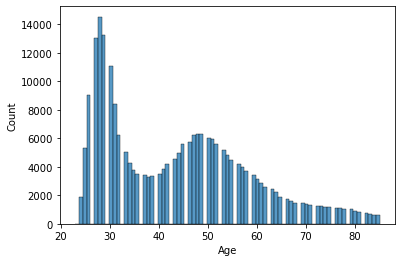

In [25]:
sns.histplot(train['Age'])

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

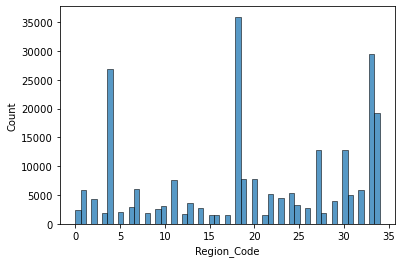

In [26]:
sns.histplot(train['Region_Code'])

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

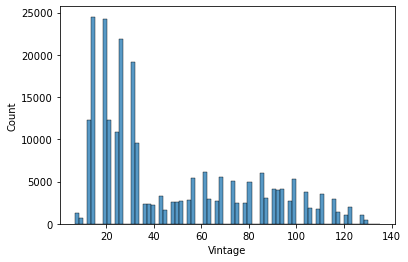

In [27]:
sns.histplot(train['Vintage'])

In [28]:
#import pandas as pd
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score
from statistics import mean
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [29]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=4)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.shape)
print(train.shape)

(172007, 9)
(73718, 9)
(172007,)
(73718,)
(245725,)
(245725, 9)


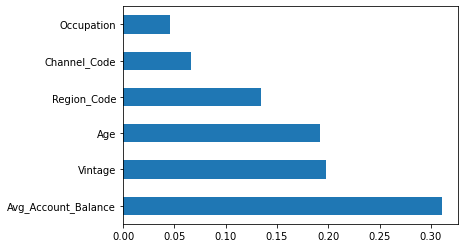

In [31]:
#used tree based feature selection for slecting more important features as this process combines both filtering and
#wrapper methods and notmuch expensive
def feature_importance(x_train,y_train):
    model = RandomForestClassifier(n_estimators=120)
    model.fit(X_train,y_train)
    importances=model.feature_importances_
    final_df=pd.DataFrame({'Features':x_train.columns,'Importances':importances})
    final_df.set_index('Importances')
    final_df=final_df.sort_values('Importances',ascending=False)
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df
imp=feature_importance(X_train,y_train)

In [32]:
#checking less important features which are not useful fro model 
display(imp)

,Features,Importances
7,Avg_Account_Balance,0.310689
5,Vintage,0.198208
1,Age,0.191980
2,Region_Code,0.134666
4,Channel_Code,0.065805
3,Occupation,0.045981
0,Gender,0.020433
8,Is_Active,0.017711
6,Credit_Product,0.014528


In [33]:
# # remove unuseful features from the train,test
X_train=X_train.drop(['Is_Active', 'Gender','Credit_Product'],axis=1)
X_test=X_test.drop(['Is_Active', 'Gender','Credit_Product'],axis=1)
#test=test.drop(['Is_Active', 'Gender','Credit_Product'],axis=1)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict_proba(X_test)[:,1]
rfc_score = roc_auc_score(y_test,rfc_pred)
print(rfc_score)

0.7312972533456754


In [35]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(verbose=0, n_estimators=100)
cbc.fit(X_train, y_train)
cbc_pred=cbc.predict_proba(X_test)[:,1]
cbc_score = roc_auc_score(y_test,cbc_pred)
print(cbc_score)

0.7719604797188349


In [36]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_pred=lgbm.predict_proba(X_test)[:,1]
lgbm_score = roc_auc_score(y_test,lgbm_pred)
print(lgbm_score)

0.7743373432670781


In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)
xgb_pred=xgb.predict_proba(X_test)[:,1]
xgb_score = roc_auc_score(y_test,xgb_pred)
print(xgb_score)

[22:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7709401063049148


In [38]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]
r_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [39]:
rfc_random = RandomizedSearchCV(estimator=rfc, 
                                param_distributions=r_grid, 
                                n_iter = 20, 
                                scoring='roc_auc', 
                                cv = 3, verbose=2, 
                                random_state=42, n_jobs=-1, 
                                return_train_score=True)
rfc_random.fit(X_train, y_train);
y_pred=rfc_random.predict_proba(X_test)[:,1]
rfc_random_score = roc_auc_score(y_test,y_pred)
print(rfc_random_score)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0.7720649464711041


In [40]:
accuracy=[]
def cross_val(X, y, model, params, folds=20):
    kfold=StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for fold, (train_index, test_index) in enumerate(kfold.split(X,y)):
        print("Fold:",fold)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        pred = model.predict_proba(X_test)[:,1]
        score = roc_auc_score(y_test,pred)
        accuracy.append(score)
        print("roc_auc_score:",(score))
    return model

In [44]:
from lightgbm import LGBMClassifier
params = {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749
}
model = LGBMClassifier()
lgb_model = cross_val(train, y, model, params)
print(np.mean(accuracy))

Fold: 0
roc_auc_score: 0.788451586383
Fold: 1
roc_auc_score: 0.7913485042486322
Fold: 2
roc_auc_score: 0.7838738470638791
Fold: 3
roc_auc_score: 0.7968180646852161
Fold: 4
roc_auc_score: 0.7895720730119058
Fold: 5
roc_auc_score: 0.7921625654595195
Fold: 6
roc_auc_score: 0.7856840430072375
Fold: 7
roc_auc_score: 0.7845538529318629
Fold: 8
roc_auc_score: 0.7953197413929721
Fold: 9
roc_auc_score: 0.7909061762266785
Fold: 10
roc_auc_score: 0.785913940413346
Fold: 11
roc_auc_score: 0.7819983611868586
Fold: 12
roc_auc_score: 0.7836496056683688
Fold: 13
roc_auc_score: 0.7959126559025542
Fold: 14
roc_auc_score: 0.7863160091348198
Fold: 15
roc_auc_score: 0.7963992174590355
Fold: 16
roc_auc_score: 0.7935359996965214
Fold: 17
roc_auc_score: 0.7826178643539711
Fold: 18
roc_auc_score: 0.7872520840452818
Fold: 19
roc_auc_score: 0.794977058707999
0.7893631625489831


In [45]:
from xgboost import XGBClassifier
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453
            }
model = XGBClassifier(use_label_encoder =False)
xg_model = cross_val(train, y, model, xgb_params)
print(np.mean(accuracy))

Fold: 0
[22:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc_score: 0.7867405848888225
Fold: 1
[22:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc_score: 0.7892212780817135
Fold: 2
[22:50:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

In [46]:
from catboost import CatBoostClassifier
cat_params= {'n_estimators': 2000, 
                  'depth': 4, 
                  'learning_rate': 0.023, 
                  'colsample_bylevel': 0.655, 
                  'bagging_temperature': 0.921, 
                  'l2_leaf_reg': 10.133}
model = CatBoostClassifier()
cat_model = cross_val(train, y, model, cat_params)
print(np.mean(accuracy))

Fold: 0
Learning rate set to 0.105717
0:	learn: 0.6358635	total: 67.1ms	remaining: 1m 6s
1:	learn: 0.5953831	total: 121ms	remaining: 1m
2:	learn: 0.5648417	total: 180ms	remaining: 60s
3:	learn: 0.5400380	total: 251ms	remaining: 1m 2s
4:	learn: 0.5200820	total: 325ms	remaining: 1m 4s
5:	learn: 0.5059236	total: 382ms	remaining: 1m 3s
6:	learn: 0.4949286	total: 450ms	remaining: 1m 3s
7:	learn: 0.4855743	total: 508ms	remaining: 1m 3s
8:	learn: 0.4784274	total: 566ms	remaining: 1m 2s
9:	learn: 0.4729869	total: 633ms	remaining: 1m 2s
10:	learn: 0.4687477	total: 705ms	remaining: 1m 3s
11:	learn: 0.4646895	total: 781ms	remaining: 1m 4s
12:	learn: 0.4621377	total: 856ms	remaining: 1m 4s
13:	learn: 0.4593174	total: 931ms	remaining: 1m 5s
14:	learn: 0.4576138	total: 1.01s	remaining: 1m 6s
15:	learn: 0.4563094	total: 1.08s	remaining: 1m 6s
16:	learn: 0.4549642	total: 1.17s	remaining: 1m 7s
17:	learn: 0.4531242	total: 1.26s	remaining: 1m 8s
18:	learn: 0.4520808	total: 1.39s	remaining: 1m 11s
19:	le

158:	learn: 0.4358473	total: 13.6s	remaining: 1m 11s
159:	learn: 0.4358138	total: 13.7s	remaining: 1m 11s
160:	learn: 0.4357853	total: 13.8s	remaining: 1m 11s
161:	learn: 0.4357452	total: 13.8s	remaining: 1m 11s
162:	learn: 0.4357070	total: 13.9s	remaining: 1m 11s
163:	learn: 0.4356835	total: 14s	remaining: 1m 11s
164:	learn: 0.4356566	total: 14s	remaining: 1m 10s
165:	learn: 0.4356119	total: 14.1s	remaining: 1m 10s
166:	learn: 0.4355922	total: 14.2s	remaining: 1m 10s
167:	learn: 0.4355642	total: 14.3s	remaining: 1m 10s
168:	learn: 0.4355378	total: 14.3s	remaining: 1m 10s
169:	learn: 0.4355139	total: 14.4s	remaining: 1m 10s
170:	learn: 0.4354849	total: 14.5s	remaining: 1m 10s
171:	learn: 0.4354459	total: 14.5s	remaining: 1m 9s
172:	learn: 0.4354216	total: 14.6s	remaining: 1m 9s
173:	learn: 0.4353965	total: 14.7s	remaining: 1m 9s
174:	learn: 0.4353704	total: 14.7s	remaining: 1m 9s
175:	learn: 0.4353527	total: 14.8s	remaining: 1m 9s
176:	learn: 0.4353197	total: 14.9s	remaining: 1m 9s
177

319:	learn: 0.4316980	total: 24.4s	remaining: 51.8s
320:	learn: 0.4316685	total: 24.4s	remaining: 51.6s
321:	learn: 0.4316453	total: 24.5s	remaining: 51.5s
322:	learn: 0.4316165	total: 24.5s	remaining: 51.4s
323:	learn: 0.4315899	total: 24.6s	remaining: 51.3s
324:	learn: 0.4315692	total: 24.7s	remaining: 51.2s
325:	learn: 0.4315550	total: 24.7s	remaining: 51.1s
326:	learn: 0.4315373	total: 24.8s	remaining: 51s
327:	learn: 0.4315180	total: 24.9s	remaining: 50.9s
328:	learn: 0.4315022	total: 24.9s	remaining: 50.8s
329:	learn: 0.4314789	total: 25s	remaining: 50.7s
330:	learn: 0.4314550	total: 25.1s	remaining: 50.6s
331:	learn: 0.4314357	total: 25.1s	remaining: 50.5s
332:	learn: 0.4314170	total: 25.2s	remaining: 50.4s
333:	learn: 0.4313840	total: 25.2s	remaining: 50.3s
334:	learn: 0.4313604	total: 25.3s	remaining: 50.2s
335:	learn: 0.4313466	total: 25.4s	remaining: 50.1s
336:	learn: 0.4313327	total: 25.4s	remaining: 50s
337:	learn: 0.4313100	total: 25.5s	remaining: 49.9s
338:	learn: 0.4312

479:	learn: 0.4284364	total: 34.7s	remaining: 37.6s
480:	learn: 0.4284124	total: 34.8s	remaining: 37.5s
481:	learn: 0.4283962	total: 34.8s	remaining: 37.4s
482:	learn: 0.4283831	total: 34.9s	remaining: 37.4s
483:	learn: 0.4283637	total: 35s	remaining: 37.3s
484:	learn: 0.4283420	total: 35.1s	remaining: 37.2s
485:	learn: 0.4283217	total: 35.2s	remaining: 37.2s
486:	learn: 0.4282979	total: 35.3s	remaining: 37.2s
487:	learn: 0.4282816	total: 35.3s	remaining: 37.1s
488:	learn: 0.4282643	total: 35.4s	remaining: 37s
489:	learn: 0.4282485	total: 35.5s	remaining: 37s
490:	learn: 0.4282275	total: 35.6s	remaining: 36.9s
491:	learn: 0.4282114	total: 35.7s	remaining: 36.8s
492:	learn: 0.4281995	total: 35.7s	remaining: 36.8s
493:	learn: 0.4281798	total: 35.8s	remaining: 36.7s
494:	learn: 0.4281515	total: 35.9s	remaining: 36.6s
495:	learn: 0.4281360	total: 36s	remaining: 36.5s
496:	learn: 0.4281199	total: 36s	remaining: 36.5s
497:	learn: 0.4280983	total: 36.1s	remaining: 36.4s
498:	learn: 0.4280833	

640:	learn: 0.4256299	total: 45.5s	remaining: 25.5s
641:	learn: 0.4256125	total: 45.5s	remaining: 25.4s
642:	learn: 0.4255925	total: 45.6s	remaining: 25.3s
643:	learn: 0.4255793	total: 45.7s	remaining: 25.2s
644:	learn: 0.4255598	total: 45.7s	remaining: 25.2s
645:	learn: 0.4255422	total: 45.8s	remaining: 25.1s
646:	learn: 0.4255214	total: 45.8s	remaining: 25s
647:	learn: 0.4255115	total: 45.9s	remaining: 24.9s
648:	learn: 0.4254977	total: 46s	remaining: 24.9s
649:	learn: 0.4254785	total: 46s	remaining: 24.8s
650:	learn: 0.4254663	total: 46.1s	remaining: 24.7s
651:	learn: 0.4254418	total: 46.1s	remaining: 24.6s
652:	learn: 0.4254158	total: 46.2s	remaining: 24.6s
653:	learn: 0.4254021	total: 46.3s	remaining: 24.5s
654:	learn: 0.4253882	total: 46.3s	remaining: 24.4s
655:	learn: 0.4253757	total: 46.4s	remaining: 24.3s
656:	learn: 0.4253629	total: 46.5s	remaining: 24.3s
657:	learn: 0.4253486	total: 46.5s	remaining: 24.2s
658:	learn: 0.4253376	total: 46.6s	remaining: 24.1s
659:	learn: 0.4253

800:	learn: 0.4229867	total: 56.9s	remaining: 14.1s
801:	learn: 0.4229649	total: 57s	remaining: 14.1s
802:	learn: 0.4229576	total: 57.1s	remaining: 14s
803:	learn: 0.4229403	total: 57.1s	remaining: 13.9s
804:	learn: 0.4229174	total: 57.2s	remaining: 13.9s
805:	learn: 0.4229000	total: 57.3s	remaining: 13.8s
806:	learn: 0.4228834	total: 57.3s	remaining: 13.7s
807:	learn: 0.4228686	total: 57.4s	remaining: 13.6s
808:	learn: 0.4228562	total: 57.5s	remaining: 13.6s
809:	learn: 0.4228414	total: 57.6s	remaining: 13.5s
810:	learn: 0.4228265	total: 57.6s	remaining: 13.4s
811:	learn: 0.4228062	total: 57.7s	remaining: 13.4s
812:	learn: 0.4227888	total: 57.8s	remaining: 13.3s
813:	learn: 0.4227689	total: 57.9s	remaining: 13.2s
814:	learn: 0.4227525	total: 57.9s	remaining: 13.2s
815:	learn: 0.4227381	total: 58s	remaining: 13.1s
816:	learn: 0.4227236	total: 58.1s	remaining: 13s
817:	learn: 0.4227095	total: 58.1s	remaining: 12.9s
818:	learn: 0.4226934	total: 58.2s	remaining: 12.9s
819:	learn: 0.422675

959:	learn: 0.4206046	total: 1m 10s	remaining: 2.93s
960:	learn: 0.4205863	total: 1m 10s	remaining: 2.86s
961:	learn: 0.4205744	total: 1m 10s	remaining: 2.79s
962:	learn: 0.4205597	total: 1m 10s	remaining: 2.71s
963:	learn: 0.4205511	total: 1m 10s	remaining: 2.64s
964:	learn: 0.4205312	total: 1m 10s	remaining: 2.57s
965:	learn: 0.4205227	total: 1m 10s	remaining: 2.49s
966:	learn: 0.4205112	total: 1m 10s	remaining: 2.42s
967:	learn: 0.4204957	total: 1m 10s	remaining: 2.34s
968:	learn: 0.4204847	total: 1m 10s	remaining: 2.27s
969:	learn: 0.4204673	total: 1m 11s	remaining: 2.2s
970:	learn: 0.4204482	total: 1m 11s	remaining: 2.12s
971:	learn: 0.4204339	total: 1m 11s	remaining: 2.05s
972:	learn: 0.4204189	total: 1m 11s	remaining: 1.98s
973:	learn: 0.4204052	total: 1m 11s	remaining: 1.9s
974:	learn: 0.4203938	total: 1m 11s	remaining: 1.83s
975:	learn: 0.4203820	total: 1m 11s	remaining: 1.76s
976:	learn: 0.4203717	total: 1m 11s	remaining: 1.68s
977:	learn: 0.4203553	total: 1m 11s	remaining: 1

119:	learn: 0.4374735	total: 7.52s	remaining: 55.2s
120:	learn: 0.4374505	total: 7.59s	remaining: 55.2s
121:	learn: 0.4374144	total: 7.65s	remaining: 55.1s
122:	learn: 0.4373635	total: 7.71s	remaining: 55s
123:	learn: 0.4373370	total: 7.79s	remaining: 55s
124:	learn: 0.4373113	total: 7.85s	remaining: 55s
125:	learn: 0.4372723	total: 7.91s	remaining: 54.9s
126:	learn: 0.4372470	total: 7.96s	remaining: 54.7s
127:	learn: 0.4372200	total: 8.02s	remaining: 54.6s
128:	learn: 0.4371901	total: 8.08s	remaining: 54.6s
129:	learn: 0.4371551	total: 8.15s	remaining: 54.5s
130:	learn: 0.4370757	total: 8.2s	remaining: 54.4s
131:	learn: 0.4370395	total: 8.27s	remaining: 54.4s
132:	learn: 0.4370057	total: 8.33s	remaining: 54.3s
133:	learn: 0.4369626	total: 8.38s	remaining: 54.2s
134:	learn: 0.4369302	total: 8.44s	remaining: 54.1s
135:	learn: 0.4368727	total: 8.53s	remaining: 54.2s
136:	learn: 0.4368334	total: 8.59s	remaining: 54.1s
137:	learn: 0.4367991	total: 8.65s	remaining: 54.1s
138:	learn: 0.43673

280:	learn: 0.4327967	total: 18.1s	remaining: 46.2s
281:	learn: 0.4327711	total: 18.1s	remaining: 46.2s
282:	learn: 0.4327496	total: 18.2s	remaining: 46.1s
283:	learn: 0.4327216	total: 18.3s	remaining: 46.1s
284:	learn: 0.4326891	total: 18.3s	remaining: 46s
285:	learn: 0.4326648	total: 18.4s	remaining: 45.9s
286:	learn: 0.4326393	total: 18.5s	remaining: 45.8s
287:	learn: 0.4326086	total: 18.5s	remaining: 45.8s
288:	learn: 0.4325915	total: 18.6s	remaining: 45.8s
289:	learn: 0.4325733	total: 18.7s	remaining: 45.7s
290:	learn: 0.4325473	total: 18.7s	remaining: 45.6s
291:	learn: 0.4325157	total: 18.8s	remaining: 45.5s
292:	learn: 0.4324932	total: 18.9s	remaining: 45.5s
293:	learn: 0.4324759	total: 18.9s	remaining: 45.5s
294:	learn: 0.4324599	total: 19s	remaining: 45.4s
295:	learn: 0.4323930	total: 19.1s	remaining: 45.3s
296:	learn: 0.4323741	total: 19.1s	remaining: 45.3s
297:	learn: 0.4323505	total: 19.2s	remaining: 45.2s
298:	learn: 0.4323248	total: 19.2s	remaining: 45.1s
299:	learn: 0.43

441:	learn: 0.4294301	total: 28.3s	remaining: 35.7s
442:	learn: 0.4294102	total: 28.4s	remaining: 35.7s
443:	learn: 0.4293943	total: 28.4s	remaining: 35.6s
444:	learn: 0.4293780	total: 28.5s	remaining: 35.5s
445:	learn: 0.4293569	total: 28.6s	remaining: 35.5s
446:	learn: 0.4293367	total: 28.6s	remaining: 35.4s
447:	learn: 0.4293198	total: 28.7s	remaining: 35.3s
448:	learn: 0.4292949	total: 28.7s	remaining: 35.3s
449:	learn: 0.4292773	total: 28.8s	remaining: 35.2s
450:	learn: 0.4292553	total: 28.9s	remaining: 35.2s
451:	learn: 0.4292347	total: 29s	remaining: 35.1s
452:	learn: 0.4292130	total: 29s	remaining: 35s
453:	learn: 0.4291897	total: 29.1s	remaining: 35s
454:	learn: 0.4291819	total: 29.1s	remaining: 34.9s
455:	learn: 0.4291580	total: 29.2s	remaining: 34.8s
456:	learn: 0.4291370	total: 29.3s	remaining: 34.8s
457:	learn: 0.4291195	total: 29.3s	remaining: 34.7s
458:	learn: 0.4291053	total: 29.4s	remaining: 34.7s
459:	learn: 0.4290872	total: 29.5s	remaining: 34.6s
460:	learn: 0.429075

600:	learn: 0.4264443	total: 39.2s	remaining: 26s
601:	learn: 0.4264231	total: 39.3s	remaining: 26s
602:	learn: 0.4264127	total: 39.3s	remaining: 25.9s
603:	learn: 0.4264015	total: 39.4s	remaining: 25.8s
604:	learn: 0.4263760	total: 39.4s	remaining: 25.8s
605:	learn: 0.4263604	total: 39.5s	remaining: 25.7s
606:	learn: 0.4263457	total: 39.6s	remaining: 25.6s
607:	learn: 0.4263344	total: 39.6s	remaining: 25.5s
608:	learn: 0.4263156	total: 39.7s	remaining: 25.5s
609:	learn: 0.4262955	total: 39.8s	remaining: 25.4s
610:	learn: 0.4262715	total: 39.8s	remaining: 25.3s
611:	learn: 0.4262522	total: 39.9s	remaining: 25.3s
612:	learn: 0.4262329	total: 39.9s	remaining: 25.2s
613:	learn: 0.4262115	total: 40s	remaining: 25.2s
614:	learn: 0.4261937	total: 40.1s	remaining: 25.1s
615:	learn: 0.4261771	total: 40.2s	remaining: 25s
616:	learn: 0.4261596	total: 40.2s	remaining: 25s
617:	learn: 0.4261365	total: 40.3s	remaining: 24.9s
618:	learn: 0.4261250	total: 40.4s	remaining: 24.8s
619:	learn: 0.4261064	

759:	learn: 0.4236956	total: 50.5s	remaining: 15.9s
760:	learn: 0.4236811	total: 50.6s	remaining: 15.9s
761:	learn: 0.4236614	total: 50.6s	remaining: 15.8s
762:	learn: 0.4236476	total: 50.7s	remaining: 15.8s
763:	learn: 0.4236297	total: 50.8s	remaining: 15.7s
764:	learn: 0.4236132	total: 50.9s	remaining: 15.6s
765:	learn: 0.4235921	total: 51s	remaining: 15.6s
766:	learn: 0.4235688	total: 51.1s	remaining: 15.5s
767:	learn: 0.4235494	total: 51.3s	remaining: 15.5s
768:	learn: 0.4235399	total: 51.4s	remaining: 15.4s
769:	learn: 0.4235266	total: 51.4s	remaining: 15.4s
770:	learn: 0.4235065	total: 51.5s	remaining: 15.3s
771:	learn: 0.4234900	total: 51.6s	remaining: 15.3s
772:	learn: 0.4234674	total: 51.7s	remaining: 15.2s
773:	learn: 0.4234509	total: 51.9s	remaining: 15.1s
774:	learn: 0.4234375	total: 52s	remaining: 15.1s
775:	learn: 0.4234214	total: 52.1s	remaining: 15s
776:	learn: 0.4234071	total: 52.2s	remaining: 15s
777:	learn: 0.4233961	total: 52.3s	remaining: 14.9s
778:	learn: 0.423386

922:	learn: 0.4211336	total: 1m 2s	remaining: 5.22s
923:	learn: 0.4211190	total: 1m 2s	remaining: 5.15s
924:	learn: 0.4211028	total: 1m 2s	remaining: 5.08s
925:	learn: 0.4210819	total: 1m 2s	remaining: 5.01s
926:	learn: 0.4210633	total: 1m 2s	remaining: 4.95s
927:	learn: 0.4210472	total: 1m 2s	remaining: 4.88s
928:	learn: 0.4210290	total: 1m 2s	remaining: 4.81s
929:	learn: 0.4210145	total: 1m 3s	remaining: 4.74s
930:	learn: 0.4210049	total: 1m 3s	remaining: 4.67s
931:	learn: 0.4209930	total: 1m 3s	remaining: 4.61s
932:	learn: 0.4209737	total: 1m 3s	remaining: 4.54s
933:	learn: 0.4209615	total: 1m 3s	remaining: 4.47s
934:	learn: 0.4209491	total: 1m 3s	remaining: 4.4s
935:	learn: 0.4209359	total: 1m 3s	remaining: 4.33s
936:	learn: 0.4209216	total: 1m 3s	remaining: 4.26s
937:	learn: 0.4209103	total: 1m 3s	remaining: 4.2s
938:	learn: 0.4208976	total: 1m 3s	remaining: 4.13s
939:	learn: 0.4208888	total: 1m 3s	remaining: 4.06s
940:	learn: 0.4208794	total: 1m 3s	remaining: 4s
941:	learn: 0.420

81:	learn: 0.4389890	total: 4.96s	remaining: 55.5s
82:	learn: 0.4389637	total: 5.01s	remaining: 55.3s
83:	learn: 0.4389366	total: 5.06s	remaining: 55.2s
84:	learn: 0.4388935	total: 5.12s	remaining: 55.1s
85:	learn: 0.4388403	total: 5.18s	remaining: 55.1s
86:	learn: 0.4387871	total: 5.25s	remaining: 55.1s
87:	learn: 0.4387625	total: 5.31s	remaining: 55s
88:	learn: 0.4387291	total: 5.36s	remaining: 54.9s
89:	learn: 0.4386840	total: 5.42s	remaining: 54.8s
90:	learn: 0.4386173	total: 5.49s	remaining: 54.8s
91:	learn: 0.4384234	total: 5.55s	remaining: 54.8s
92:	learn: 0.4383768	total: 5.61s	remaining: 54.7s
93:	learn: 0.4382857	total: 5.69s	remaining: 54.8s
94:	learn: 0.4382499	total: 5.75s	remaining: 54.7s
95:	learn: 0.4382131	total: 5.82s	remaining: 54.8s
96:	learn: 0.4381790	total: 5.87s	remaining: 54.7s
97:	learn: 0.4381376	total: 5.94s	remaining: 54.7s
98:	learn: 0.4380946	total: 6s	remaining: 54.6s
99:	learn: 0.4380511	total: 6.06s	remaining: 54.6s
100:	learn: 0.4380053	total: 6.12s	r

241:	learn: 0.4333075	total: 15.1s	remaining: 47.2s
242:	learn: 0.4332777	total: 15.1s	remaining: 47.1s
243:	learn: 0.4332418	total: 15.2s	remaining: 47s
244:	learn: 0.4332188	total: 15.2s	remaining: 47s
245:	learn: 0.4332045	total: 15.3s	remaining: 46.9s
246:	learn: 0.4331746	total: 15.4s	remaining: 46.9s
247:	learn: 0.4331592	total: 15.4s	remaining: 46.8s
248:	learn: 0.4331338	total: 15.5s	remaining: 46.7s
249:	learn: 0.4331031	total: 15.6s	remaining: 46.7s
250:	learn: 0.4330790	total: 15.6s	remaining: 46.6s
251:	learn: 0.4330510	total: 15.7s	remaining: 46.5s
252:	learn: 0.4330263	total: 15.7s	remaining: 46.5s
253:	learn: 0.4330062	total: 15.8s	remaining: 46.5s
254:	learn: 0.4329849	total: 15.9s	remaining: 46.4s
255:	learn: 0.4329589	total: 15.9s	remaining: 46.3s
256:	learn: 0.4329358	total: 16s	remaining: 46.3s
257:	learn: 0.4329134	total: 16.1s	remaining: 46.2s
258:	learn: 0.4328973	total: 16.1s	remaining: 46.1s
259:	learn: 0.4328755	total: 16.2s	remaining: 46.1s
260:	learn: 0.4328

400:	learn: 0.4297627	total: 25.2s	remaining: 37.6s
401:	learn: 0.4297461	total: 25.2s	remaining: 37.6s
402:	learn: 0.4297329	total: 25.3s	remaining: 37.5s
403:	learn: 0.4297113	total: 25.4s	remaining: 37.4s
404:	learn: 0.4296815	total: 25.4s	remaining: 37.4s
405:	learn: 0.4296599	total: 25.5s	remaining: 37.3s
406:	learn: 0.4296403	total: 25.5s	remaining: 37.2s
407:	learn: 0.4296276	total: 25.6s	remaining: 37.2s
408:	learn: 0.4296032	total: 25.7s	remaining: 37.1s
409:	learn: 0.4295847	total: 25.8s	remaining: 37.1s
410:	learn: 0.4295637	total: 25.8s	remaining: 37s
411:	learn: 0.4295515	total: 25.9s	remaining: 37s
412:	learn: 0.4295224	total: 26s	remaining: 36.9s
413:	learn: 0.4295084	total: 26s	remaining: 36.8s
414:	learn: 0.4294952	total: 26.1s	remaining: 36.8s
415:	learn: 0.4294638	total: 26.1s	remaining: 36.7s
416:	learn: 0.4294398	total: 26.2s	remaining: 36.6s
417:	learn: 0.4294233	total: 26.3s	remaining: 36.6s
418:	learn: 0.4294074	total: 26.4s	remaining: 36.5s
419:	learn: 0.429377

559:	learn: 0.4266907	total: 35.9s	remaining: 28.2s
560:	learn: 0.4266719	total: 36s	remaining: 28.2s
561:	learn: 0.4266525	total: 36.1s	remaining: 28.1s
562:	learn: 0.4266370	total: 36.1s	remaining: 28s
563:	learn: 0.4266143	total: 36.2s	remaining: 28s
564:	learn: 0.4265945	total: 36.2s	remaining: 27.9s
565:	learn: 0.4265836	total: 36.3s	remaining: 27.8s
566:	learn: 0.4265677	total: 36.4s	remaining: 27.8s
567:	learn: 0.4265485	total: 36.4s	remaining: 27.7s
568:	learn: 0.4265381	total: 36.5s	remaining: 27.6s
569:	learn: 0.4265221	total: 36.5s	remaining: 27.6s
570:	learn: 0.4265017	total: 36.6s	remaining: 27.5s
571:	learn: 0.4264844	total: 36.7s	remaining: 27.4s
572:	learn: 0.4264596	total: 36.7s	remaining: 27.4s
573:	learn: 0.4264437	total: 36.8s	remaining: 27.3s
574:	learn: 0.4264201	total: 36.9s	remaining: 27.2s
575:	learn: 0.4263953	total: 36.9s	remaining: 27.2s
576:	learn: 0.4263732	total: 37s	remaining: 27.1s
577:	learn: 0.4263579	total: 37.1s	remaining: 27.1s
578:	learn: 0.426336

720:	learn: 0.4239076	total: 49s	remaining: 19s
721:	learn: 0.4238921	total: 49.1s	remaining: 18.9s
722:	learn: 0.4238707	total: 49.2s	remaining: 18.8s
723:	learn: 0.4238497	total: 49.2s	remaining: 18.8s
724:	learn: 0.4238307	total: 49.3s	remaining: 18.7s
725:	learn: 0.4238150	total: 49.3s	remaining: 18.6s
726:	learn: 0.4238062	total: 49.4s	remaining: 18.6s
727:	learn: 0.4237910	total: 49.5s	remaining: 18.5s
728:	learn: 0.4237738	total: 49.6s	remaining: 18.4s
729:	learn: 0.4237582	total: 49.7s	remaining: 18.4s
730:	learn: 0.4237371	total: 49.7s	remaining: 18.3s
731:	learn: 0.4237202	total: 49.8s	remaining: 18.2s
732:	learn: 0.4237042	total: 49.9s	remaining: 18.2s
733:	learn: 0.4236825	total: 49.9s	remaining: 18.1s
734:	learn: 0.4236703	total: 50s	remaining: 18s
735:	learn: 0.4236545	total: 50.1s	remaining: 18s
736:	learn: 0.4236448	total: 50.1s	remaining: 17.9s
737:	learn: 0.4236341	total: 50.2s	remaining: 17.8s
738:	learn: 0.4236242	total: 50.2s	remaining: 17.7s
739:	learn: 0.4236072	

879:	learn: 0.4214045	total: 1m	remaining: 8.21s
880:	learn: 0.4213875	total: 1m	remaining: 8.14s
881:	learn: 0.4213746	total: 1m	remaining: 8.08s
882:	learn: 0.4213610	total: 1m	remaining: 8.01s
883:	learn: 0.4213406	total: 1m	remaining: 7.94s
884:	learn: 0.4213274	total: 1m	remaining: 7.87s
885:	learn: 0.4213157	total: 1m	remaining: 7.8s
886:	learn: 0.4213024	total: 1m	remaining: 7.74s
887:	learn: 0.4212886	total: 1m	remaining: 7.67s
888:	learn: 0.4212695	total: 1m	remaining: 7.6s
889:	learn: 0.4212559	total: 1m	remaining: 7.53s
890:	learn: 0.4212349	total: 1m 1s	remaining: 7.46s
891:	learn: 0.4212151	total: 1m 1s	remaining: 7.4s
892:	learn: 0.4211972	total: 1m 1s	remaining: 7.33s
893:	learn: 0.4211829	total: 1m 1s	remaining: 7.26s
894:	learn: 0.4211656	total: 1m 1s	remaining: 7.19s
895:	learn: 0.4211525	total: 1m 1s	remaining: 7.12s
896:	learn: 0.4211354	total: 1m 1s	remaining: 7.05s
897:	learn: 0.4211151	total: 1m 1s	remaining: 6.99s
898:	learn: 0.4211006	total: 1m 1s	remaining: 6.

39:	learn: 0.4433327	total: 2.66s	remaining: 1m 3s
40:	learn: 0.4432570	total: 2.72s	remaining: 1m 3s
41:	learn: 0.4431210	total: 2.77s	remaining: 1m 3s
42:	learn: 0.4429769	total: 2.83s	remaining: 1m 2s
43:	learn: 0.4429030	total: 2.91s	remaining: 1m 3s
44:	learn: 0.4427247	total: 2.98s	remaining: 1m 3s
45:	learn: 0.4425991	total: 3.05s	remaining: 1m 3s
46:	learn: 0.4424138	total: 3.14s	remaining: 1m 3s
47:	learn: 0.4423228	total: 3.21s	remaining: 1m 3s
48:	learn: 0.4422556	total: 3.28s	remaining: 1m 3s
49:	learn: 0.4416967	total: 3.36s	remaining: 1m 3s
50:	learn: 0.4416023	total: 3.42s	remaining: 1m 3s
51:	learn: 0.4415535	total: 3.49s	remaining: 1m 3s
52:	learn: 0.4414753	total: 3.55s	remaining: 1m 3s
53:	learn: 0.4414050	total: 3.61s	remaining: 1m 3s
54:	learn: 0.4413629	total: 3.69s	remaining: 1m 3s
55:	learn: 0.4412322	total: 3.75s	remaining: 1m 3s
56:	learn: 0.4411513	total: 3.83s	remaining: 1m 3s
57:	learn: 0.4409748	total: 3.93s	remaining: 1m 3s
58:	learn: 0.4409357	total: 4.0

197:	learn: 0.4350461	total: 18.5s	remaining: 1m 15s
198:	learn: 0.4350205	total: 18.6s	remaining: 1m 15s
199:	learn: 0.4349988	total: 18.7s	remaining: 1m 14s
200:	learn: 0.4349776	total: 18.9s	remaining: 1m 15s
201:	learn: 0.4349463	total: 19s	remaining: 1m 15s
202:	learn: 0.4348946	total: 19.2s	remaining: 1m 15s
203:	learn: 0.4348562	total: 19.3s	remaining: 1m 15s
204:	learn: 0.4348324	total: 19.5s	remaining: 1m 15s
205:	learn: 0.4348037	total: 19.6s	remaining: 1m 15s
206:	learn: 0.4347766	total: 19.7s	remaining: 1m 15s
207:	learn: 0.4347527	total: 19.8s	remaining: 1m 15s
208:	learn: 0.4347308	total: 20s	remaining: 1m 15s
209:	learn: 0.4347047	total: 20.1s	remaining: 1m 15s
210:	learn: 0.4346833	total: 20.2s	remaining: 1m 15s
211:	learn: 0.4346650	total: 20.3s	remaining: 1m 15s
212:	learn: 0.4346388	total: 20.4s	remaining: 1m 15s
213:	learn: 0.4346046	total: 20.5s	remaining: 1m 15s
214:	learn: 0.4345847	total: 20.6s	remaining: 1m 15s
215:	learn: 0.4345612	total: 20.7s	remaining: 1m 1

354:	learn: 0.4313010	total: 34.7s	remaining: 1m 3s
355:	learn: 0.4312806	total: 34.8s	remaining: 1m 2s
356:	learn: 0.4312564	total: 34.9s	remaining: 1m 2s
357:	learn: 0.4312371	total: 35s	remaining: 1m 2s
358:	learn: 0.4312167	total: 35.1s	remaining: 1m 2s
359:	learn: 0.4311917	total: 35.3s	remaining: 1m 2s
360:	learn: 0.4311666	total: 35.4s	remaining: 1m 2s
361:	learn: 0.4311538	total: 35.5s	remaining: 1m 2s
362:	learn: 0.4311287	total: 35.7s	remaining: 1m 2s
363:	learn: 0.4311111	total: 35.8s	remaining: 1m 2s
364:	learn: 0.4310934	total: 35.9s	remaining: 1m 2s
365:	learn: 0.4310756	total: 36s	remaining: 1m 2s
366:	learn: 0.4310581	total: 36.1s	remaining: 1m 2s
367:	learn: 0.4310387	total: 36.2s	remaining: 1m 2s
368:	learn: 0.4310167	total: 36.3s	remaining: 1m 2s
369:	learn: 0.4309947	total: 36.4s	remaining: 1m 2s
370:	learn: 0.4309786	total: 36.5s	remaining: 1m 1s
371:	learn: 0.4309576	total: 36.6s	remaining: 1m 1s
372:	learn: 0.4309319	total: 36.7s	remaining: 1m 1s
373:	learn: 0.43

516:	learn: 0.4281840	total: 47.4s	remaining: 44.3s
517:	learn: 0.4281678	total: 47.5s	remaining: 44.2s
518:	learn: 0.4281485	total: 47.6s	remaining: 44.1s
519:	learn: 0.4281301	total: 47.7s	remaining: 44s
520:	learn: 0.4281044	total: 47.8s	remaining: 43.9s
521:	learn: 0.4280808	total: 47.8s	remaining: 43.8s
522:	learn: 0.4280645	total: 47.9s	remaining: 43.7s
523:	learn: 0.4280507	total: 48s	remaining: 43.6s
524:	learn: 0.4280257	total: 48s	remaining: 43.5s
525:	learn: 0.4280124	total: 48.1s	remaining: 43.4s
526:	learn: 0.4279937	total: 48.2s	remaining: 43.2s
527:	learn: 0.4279783	total: 48.2s	remaining: 43.1s
528:	learn: 0.4279584	total: 48.3s	remaining: 43s
529:	learn: 0.4279395	total: 48.4s	remaining: 42.9s
530:	learn: 0.4279219	total: 48.5s	remaining: 42.8s
531:	learn: 0.4279088	total: 48.5s	remaining: 42.7s
532:	learn: 0.4278955	total: 48.6s	remaining: 42.6s
533:	learn: 0.4278812	total: 48.7s	remaining: 42.5s
534:	learn: 0.4278600	total: 48.7s	remaining: 42.3s
535:	learn: 0.427833

676:	learn: 0.4255134	total: 58.2s	remaining: 27.8s
677:	learn: 0.4254915	total: 58.3s	remaining: 27.7s
678:	learn: 0.4254794	total: 58.4s	remaining: 27.6s
679:	learn: 0.4254522	total: 58.4s	remaining: 27.5s
680:	learn: 0.4254381	total: 58.5s	remaining: 27.4s
681:	learn: 0.4254252	total: 58.6s	remaining: 27.3s
682:	learn: 0.4254148	total: 58.7s	remaining: 27.2s
683:	learn: 0.4254023	total: 58.8s	remaining: 27.1s
684:	learn: 0.4253892	total: 58.8s	remaining: 27s
685:	learn: 0.4253688	total: 58.9s	remaining: 27s
686:	learn: 0.4253517	total: 59s	remaining: 26.9s
687:	learn: 0.4253338	total: 59s	remaining: 26.8s
688:	learn: 0.4253159	total: 59.1s	remaining: 26.7s
689:	learn: 0.4252929	total: 59.2s	remaining: 26.6s
690:	learn: 0.4252855	total: 59.2s	remaining: 26.5s
691:	learn: 0.4252693	total: 59.3s	remaining: 26.4s
692:	learn: 0.4252503	total: 59.4s	remaining: 26.3s
693:	learn: 0.4252151	total: 59.4s	remaining: 26.2s
694:	learn: 0.4251950	total: 59.5s	remaining: 26.1s
695:	learn: 0.425182

838:	learn: 0.4228709	total: 1m 9s	remaining: 13.4s
839:	learn: 0.4228437	total: 1m 9s	remaining: 13.3s
840:	learn: 0.4228300	total: 1m 10s	remaining: 13.2s
841:	learn: 0.4228184	total: 1m 10s	remaining: 13.2s
842:	learn: 0.4227992	total: 1m 10s	remaining: 13.1s
843:	learn: 0.4227789	total: 1m 10s	remaining: 13s
844:	learn: 0.4227645	total: 1m 10s	remaining: 12.9s
845:	learn: 0.4227547	total: 1m 10s	remaining: 12.8s
846:	learn: 0.4227390	total: 1m 10s	remaining: 12.7s
847:	learn: 0.4227276	total: 1m 10s	remaining: 12.6s
848:	learn: 0.4227130	total: 1m 10s	remaining: 12.6s
849:	learn: 0.4226980	total: 1m 10s	remaining: 12.5s
850:	learn: 0.4226885	total: 1m 10s	remaining: 12.4s
851:	learn: 0.4226675	total: 1m 10s	remaining: 12.3s
852:	learn: 0.4226523	total: 1m 10s	remaining: 12.2s
853:	learn: 0.4226361	total: 1m 10s	remaining: 12.1s
854:	learn: 0.4226198	total: 1m 11s	remaining: 12s
855:	learn: 0.4226062	total: 1m 11s	remaining: 12s
856:	learn: 0.4225916	total: 1m 11s	remaining: 11.9s
8

996:	learn: 0.4205065	total: 1m 20s	remaining: 242ms
997:	learn: 0.4204914	total: 1m 20s	remaining: 162ms
998:	learn: 0.4204746	total: 1m 20s	remaining: 80.8ms
999:	learn: 0.4204539	total: 1m 20s	remaining: 0us
roc_auc_score: 0.7955610632452128
Fold: 4
Learning rate set to 0.105717
0:	learn: 0.6357596	total: 66.7ms	remaining: 1m 6s
1:	learn: 0.5952515	total: 124ms	remaining: 1m 1s
2:	learn: 0.5646844	total: 176ms	remaining: 58.4s
3:	learn: 0.5398710	total: 233ms	remaining: 58s
4:	learn: 0.5199145	total: 295ms	remaining: 58.6s
5:	learn: 0.5073822	total: 348ms	remaining: 57.6s
6:	learn: 0.4959180	total: 406ms	remaining: 57.6s
7:	learn: 0.4864040	total: 463ms	remaining: 57.4s
8:	learn: 0.4790146	total: 531ms	remaining: 58.5s
9:	learn: 0.4738831	total: 588ms	remaining: 58.2s
10:	learn: 0.4686924	total: 644ms	remaining: 57.9s
11:	learn: 0.4655219	total: 703ms	remaining: 57.9s
12:	learn: 0.4626809	total: 757ms	remaining: 57.4s
13:	learn: 0.4601986	total: 827ms	remaining: 58.2s
14:	learn: 0.4

155:	learn: 0.4363096	total: 9.99s	remaining: 54.1s
156:	learn: 0.4362737	total: 10.1s	remaining: 54.1s
157:	learn: 0.4362520	total: 10.2s	remaining: 54.1s
158:	learn: 0.4362214	total: 10.2s	remaining: 54.1s
159:	learn: 0.4361921	total: 10.3s	remaining: 54.1s
160:	learn: 0.4361672	total: 10.4s	remaining: 54s
161:	learn: 0.4361385	total: 10.4s	remaining: 54s
162:	learn: 0.4361152	total: 10.5s	remaining: 54s
163:	learn: 0.4359722	total: 10.6s	remaining: 54s
164:	learn: 0.4359088	total: 10.7s	remaining: 54s
165:	learn: 0.4358450	total: 10.7s	remaining: 54s
166:	learn: 0.4358192	total: 10.8s	remaining: 54s
167:	learn: 0.4357883	total: 10.9s	remaining: 54s
168:	learn: 0.4357558	total: 11s	remaining: 54s
169:	learn: 0.4357237	total: 11.1s	remaining: 54s
170:	learn: 0.4356931	total: 11.2s	remaining: 54.2s
171:	learn: 0.4356405	total: 11.3s	remaining: 54.3s
172:	learn: 0.4356187	total: 11.4s	remaining: 54.5s
173:	learn: 0.4355817	total: 11.5s	remaining: 54.6s
174:	learn: 0.4355423	total: 11.6s

316:	learn: 0.4317511	total: 23s	remaining: 49.6s
317:	learn: 0.4317296	total: 23.1s	remaining: 49.6s
318:	learn: 0.4317040	total: 23.2s	remaining: 49.5s
319:	learn: 0.4316869	total: 23.2s	remaining: 49.4s
320:	learn: 0.4316588	total: 23.3s	remaining: 49.3s
321:	learn: 0.4316379	total: 23.4s	remaining: 49.2s
322:	learn: 0.4316178	total: 23.4s	remaining: 49.1s
323:	learn: 0.4315949	total: 23.5s	remaining: 49s
324:	learn: 0.4315457	total: 23.5s	remaining: 48.9s
325:	learn: 0.4315263	total: 23.6s	remaining: 48.8s
326:	learn: 0.4315052	total: 23.6s	remaining: 48.7s
327:	learn: 0.4314894	total: 23.7s	remaining: 48.6s
328:	learn: 0.4314736	total: 23.8s	remaining: 48.5s
329:	learn: 0.4314573	total: 23.8s	remaining: 48.4s
330:	learn: 0.4314372	total: 23.9s	remaining: 48.3s
331:	learn: 0.4314052	total: 24s	remaining: 48.2s
332:	learn: 0.4313824	total: 24s	remaining: 48.1s
333:	learn: 0.4313616	total: 24.1s	remaining: 48s
334:	learn: 0.4313415	total: 24.1s	remaining: 47.9s
335:	learn: 0.4313186	

477:	learn: 0.4285322	total: 33.3s	remaining: 36.4s
478:	learn: 0.4285111	total: 33.4s	remaining: 36.3s
479:	learn: 0.4284919	total: 33.5s	remaining: 36.2s
480:	learn: 0.4284730	total: 33.5s	remaining: 36.2s
481:	learn: 0.4284560	total: 33.6s	remaining: 36.1s
482:	learn: 0.4284345	total: 33.6s	remaining: 36s
483:	learn: 0.4284184	total: 33.7s	remaining: 35.9s
484:	learn: 0.4284007	total: 33.8s	remaining: 35.9s
485:	learn: 0.4283904	total: 33.8s	remaining: 35.8s
486:	learn: 0.4283725	total: 33.9s	remaining: 35.7s
487:	learn: 0.4283527	total: 34s	remaining: 35.6s
488:	learn: 0.4283323	total: 34s	remaining: 35.6s
489:	learn: 0.4283110	total: 34.1s	remaining: 35.5s
490:	learn: 0.4282870	total: 34.2s	remaining: 35.4s
491:	learn: 0.4282662	total: 34.2s	remaining: 35.4s
492:	learn: 0.4282433	total: 34.3s	remaining: 35.3s
493:	learn: 0.4282211	total: 34.4s	remaining: 35.2s
494:	learn: 0.4281899	total: 34.5s	remaining: 35.2s
495:	learn: 0.4281766	total: 34.6s	remaining: 35.1s
496:	learn: 0.4281

636:	learn: 0.4256921	total: 45.3s	remaining: 25.8s
637:	learn: 0.4256774	total: 45.4s	remaining: 25.8s
638:	learn: 0.4256662	total: 45.5s	remaining: 25.7s
639:	learn: 0.4256511	total: 45.5s	remaining: 25.6s
640:	learn: 0.4256348	total: 45.6s	remaining: 25.5s
641:	learn: 0.4256127	total: 45.6s	remaining: 25.5s
642:	learn: 0.4255896	total: 45.7s	remaining: 25.4s
643:	learn: 0.4255663	total: 45.8s	remaining: 25.3s
644:	learn: 0.4255553	total: 45.8s	remaining: 25.2s
645:	learn: 0.4255435	total: 45.9s	remaining: 25.1s
646:	learn: 0.4255266	total: 46s	remaining: 25.1s
647:	learn: 0.4255081	total: 46s	remaining: 25s
648:	learn: 0.4254956	total: 46.1s	remaining: 24.9s
649:	learn: 0.4254737	total: 46.2s	remaining: 24.9s
650:	learn: 0.4254537	total: 46.3s	remaining: 24.8s
651:	learn: 0.4254418	total: 46.3s	remaining: 24.7s
652:	learn: 0.4254228	total: 46.4s	remaining: 24.6s
653:	learn: 0.4254083	total: 46.4s	remaining: 24.6s
654:	learn: 0.4253987	total: 46.5s	remaining: 24.5s
655:	learn: 0.4253

796:	learn: 0.4231359	total: 55.6s	remaining: 14.2s
797:	learn: 0.4231149	total: 55.6s	remaining: 14.1s
798:	learn: 0.4231034	total: 55.7s	remaining: 14s
799:	learn: 0.4230923	total: 55.8s	remaining: 13.9s
800:	learn: 0.4230823	total: 55.9s	remaining: 13.9s
801:	learn: 0.4230649	total: 55.9s	remaining: 13.8s
802:	learn: 0.4230518	total: 56s	remaining: 13.7s
803:	learn: 0.4230357	total: 56s	remaining: 13.7s
804:	learn: 0.4230232	total: 56.1s	remaining: 13.6s
805:	learn: 0.4230081	total: 56.2s	remaining: 13.5s
806:	learn: 0.4229959	total: 56.3s	remaining: 13.5s
807:	learn: 0.4229797	total: 56.3s	remaining: 13.4s
808:	learn: 0.4229679	total: 56.4s	remaining: 13.3s
809:	learn: 0.4229497	total: 56.4s	remaining: 13.2s
810:	learn: 0.4229310	total: 56.5s	remaining: 13.2s
811:	learn: 0.4229184	total: 56.6s	remaining: 13.1s
812:	learn: 0.4228997	total: 56.6s	remaining: 13s
813:	learn: 0.4228839	total: 56.7s	remaining: 13s
814:	learn: 0.4228733	total: 56.7s	remaining: 12.9s
815:	learn: 0.4228596	

958:	learn: 0.4206368	total: 1m 6s	remaining: 2.83s
959:	learn: 0.4206234	total: 1m 6s	remaining: 2.76s
960:	learn: 0.4206088	total: 1m 6s	remaining: 2.69s
961:	learn: 0.4205902	total: 1m 6s	remaining: 2.62s
962:	learn: 0.4205756	total: 1m 6s	remaining: 2.55s
963:	learn: 0.4205636	total: 1m 6s	remaining: 2.48s
964:	learn: 0.4205508	total: 1m 6s	remaining: 2.41s
965:	learn: 0.4205377	total: 1m 6s	remaining: 2.34s
966:	learn: 0.4205182	total: 1m 6s	remaining: 2.27s
967:	learn: 0.4205095	total: 1m 6s	remaining: 2.21s
968:	learn: 0.4204920	total: 1m 6s	remaining: 2.14s
969:	learn: 0.4204705	total: 1m 6s	remaining: 2.07s
970:	learn: 0.4204490	total: 1m 6s	remaining: 2s
971:	learn: 0.4204245	total: 1m 6s	remaining: 1.93s
972:	learn: 0.4204087	total: 1m 7s	remaining: 1.86s
973:	learn: 0.4203949	total: 1m 7s	remaining: 1.79s
974:	learn: 0.4203824	total: 1m 7s	remaining: 1.72s
975:	learn: 0.4203709	total: 1m 7s	remaining: 1.65s
976:	learn: 0.4203494	total: 1m 7s	remaining: 1.58s
977:	learn: 0.4

117:	learn: 0.4374722	total: 9.62s	remaining: 1m 11s
118:	learn: 0.4374351	total: 9.68s	remaining: 1m 11s
119:	learn: 0.4374114	total: 9.75s	remaining: 1m 11s
120:	learn: 0.4373698	total: 9.8s	remaining: 1m 11s
121:	learn: 0.4373388	total: 9.88s	remaining: 1m 11s
122:	learn: 0.4373002	total: 9.95s	remaining: 1m 10s
123:	learn: 0.4372401	total: 10s	remaining: 1m 10s
124:	learn: 0.4372028	total: 10.1s	remaining: 1m 10s
125:	learn: 0.4371623	total: 10.1s	remaining: 1m 10s
126:	learn: 0.4371303	total: 10.2s	remaining: 1m 10s
127:	learn: 0.4370981	total: 10.3s	remaining: 1m 9s
128:	learn: 0.4370411	total: 10.3s	remaining: 1m 9s
129:	learn: 0.4370026	total: 10.4s	remaining: 1m 9s
130:	learn: 0.4369353	total: 10.5s	remaining: 1m 9s
131:	learn: 0.4369050	total: 10.5s	remaining: 1m 9s
132:	learn: 0.4368719	total: 10.6s	remaining: 1m 8s
133:	learn: 0.4368336	total: 10.6s	remaining: 1m 8s
134:	learn: 0.4368081	total: 10.7s	remaining: 1m 8s
135:	learn: 0.4367733	total: 10.8s	remaining: 1m 8s
136:	

279:	learn: 0.4327502	total: 20.1s	remaining: 51.7s
280:	learn: 0.4327124	total: 20.1s	remaining: 51.6s
281:	learn: 0.4326898	total: 20.2s	remaining: 51.5s
282:	learn: 0.4326684	total: 20.3s	remaining: 51.4s
283:	learn: 0.4326395	total: 20.3s	remaining: 51.3s
284:	learn: 0.4326199	total: 20.4s	remaining: 51.2s
285:	learn: 0.4325975	total: 20.5s	remaining: 51.1s
286:	learn: 0.4325760	total: 20.5s	remaining: 51s
287:	learn: 0.4325559	total: 20.6s	remaining: 50.9s
288:	learn: 0.4324921	total: 20.7s	remaining: 50.9s
289:	learn: 0.4324682	total: 20.8s	remaining: 50.8s
290:	learn: 0.4324450	total: 20.8s	remaining: 50.7s
291:	learn: 0.4324268	total: 20.9s	remaining: 50.6s
292:	learn: 0.4324051	total: 20.9s	remaining: 50.5s
293:	learn: 0.4323885	total: 21s	remaining: 50.4s
294:	learn: 0.4323506	total: 21s	remaining: 50.3s
295:	learn: 0.4323306	total: 21.1s	remaining: 50.2s
296:	learn: 0.4323114	total: 21.2s	remaining: 50.1s
297:	learn: 0.4322863	total: 21.2s	remaining: 50s
298:	learn: 0.432263

439:	learn: 0.4293174	total: 30.3s	remaining: 38.6s
440:	learn: 0.4292879	total: 30.4s	remaining: 38.5s
441:	learn: 0.4292721	total: 30.4s	remaining: 38.4s
442:	learn: 0.4292500	total: 30.5s	remaining: 38.3s
443:	learn: 0.4292249	total: 30.6s	remaining: 38.3s
444:	learn: 0.4292078	total: 30.6s	remaining: 38.2s
445:	learn: 0.4291924	total: 30.7s	remaining: 38.1s
446:	learn: 0.4291715	total: 30.8s	remaining: 38s
447:	learn: 0.4291459	total: 30.8s	remaining: 38s
448:	learn: 0.4291189	total: 30.9s	remaining: 37.9s
449:	learn: 0.4290989	total: 31s	remaining: 37.8s
450:	learn: 0.4290741	total: 31s	remaining: 37.8s
451:	learn: 0.4290512	total: 31.1s	remaining: 37.7s
452:	learn: 0.4290348	total: 31.1s	remaining: 37.6s
453:	learn: 0.4290120	total: 31.2s	remaining: 37.5s
454:	learn: 0.4289911	total: 31.3s	remaining: 37.4s
455:	learn: 0.4289774	total: 31.3s	remaining: 37.4s
456:	learn: 0.4289564	total: 31.4s	remaining: 37.3s
457:	learn: 0.4289329	total: 31.5s	remaining: 37.2s
458:	learn: 0.428911

599:	learn: 0.4263306	total: 40.7s	remaining: 27.1s
600:	learn: 0.4263157	total: 40.7s	remaining: 27s
601:	learn: 0.4263011	total: 40.8s	remaining: 27s
602:	learn: 0.4262775	total: 40.8s	remaining: 26.9s
603:	learn: 0.4262611	total: 40.9s	remaining: 26.8s
604:	learn: 0.4262449	total: 41s	remaining: 26.7s
605:	learn: 0.4262234	total: 41s	remaining: 26.7s
606:	learn: 0.4262034	total: 41.1s	remaining: 26.6s
607:	learn: 0.4261847	total: 41.2s	remaining: 26.5s
608:	learn: 0.4261682	total: 41.2s	remaining: 26.5s
609:	learn: 0.4261472	total: 41.3s	remaining: 26.4s
610:	learn: 0.4261361	total: 41.4s	remaining: 26.3s
611:	learn: 0.4261256	total: 41.4s	remaining: 26.3s
612:	learn: 0.4261098	total: 41.5s	remaining: 26.2s
613:	learn: 0.4260977	total: 41.5s	remaining: 26.1s
614:	learn: 0.4260733	total: 41.6s	remaining: 26s
615:	learn: 0.4260567	total: 41.7s	remaining: 26s
616:	learn: 0.4260437	total: 41.7s	remaining: 25.9s
617:	learn: 0.4260234	total: 41.8s	remaining: 25.8s
618:	learn: 0.4259968	to

760:	learn: 0.4236440	total: 51s	remaining: 16s
761:	learn: 0.4236330	total: 51.1s	remaining: 15.9s
762:	learn: 0.4236216	total: 51.1s	remaining: 15.9s
763:	learn: 0.4235986	total: 51.2s	remaining: 15.8s
764:	learn: 0.4235839	total: 51.3s	remaining: 15.7s
765:	learn: 0.4235630	total: 51.3s	remaining: 15.7s
766:	learn: 0.4235487	total: 51.4s	remaining: 15.6s
767:	learn: 0.4235274	total: 51.4s	remaining: 15.5s
768:	learn: 0.4235105	total: 51.5s	remaining: 15.5s
769:	learn: 0.4234905	total: 51.6s	remaining: 15.4s
770:	learn: 0.4234797	total: 51.6s	remaining: 15.3s
771:	learn: 0.4234665	total: 51.7s	remaining: 15.3s
772:	learn: 0.4234568	total: 51.7s	remaining: 15.2s
773:	learn: 0.4234429	total: 51.8s	remaining: 15.1s
774:	learn: 0.4234266	total: 51.9s	remaining: 15.1s
775:	learn: 0.4234128	total: 51.9s	remaining: 15s
776:	learn: 0.4233957	total: 52s	remaining: 14.9s
777:	learn: 0.4233799	total: 52.1s	remaining: 14.9s
778:	learn: 0.4233673	total: 52.1s	remaining: 14.8s
779:	learn: 0.423353

922:	learn: 0.4212419	total: 1m 3s	remaining: 5.26s
923:	learn: 0.4212228	total: 1m 3s	remaining: 5.2s
924:	learn: 0.4212100	total: 1m 3s	remaining: 5.13s
925:	learn: 0.4212023	total: 1m 3s	remaining: 5.07s
926:	learn: 0.4211884	total: 1m 3s	remaining: 5s
927:	learn: 0.4211649	total: 1m 3s	remaining: 4.93s
928:	learn: 0.4211571	total: 1m 3s	remaining: 4.87s
929:	learn: 0.4211397	total: 1m 3s	remaining: 4.8s
930:	learn: 0.4211241	total: 1m 3s	remaining: 4.73s
931:	learn: 0.4211053	total: 1m 3s	remaining: 4.67s
932:	learn: 0.4210809	total: 1m 4s	remaining: 4.6s
933:	learn: 0.4210679	total: 1m 4s	remaining: 4.54s
934:	learn: 0.4210519	total: 1m 4s	remaining: 4.47s
935:	learn: 0.4210394	total: 1m 4s	remaining: 4.4s
936:	learn: 0.4210169	total: 1m 4s	remaining: 4.34s
937:	learn: 0.4210056	total: 1m 4s	remaining: 4.27s
938:	learn: 0.4209915	total: 1m 4s	remaining: 4.21s
939:	learn: 0.4209738	total: 1m 4s	remaining: 4.14s
940:	learn: 0.4209554	total: 1m 5s	remaining: 4.08s
941:	learn: 0.42094

83:	learn: 0.4391545	total: 5.43s	remaining: 59.3s
84:	learn: 0.4391358	total: 5.48s	remaining: 59s
85:	learn: 0.4390237	total: 5.53s	remaining: 58.8s
86:	learn: 0.4389164	total: 5.59s	remaining: 58.7s
87:	learn: 0.4388054	total: 5.66s	remaining: 58.6s
88:	learn: 0.4386790	total: 5.71s	remaining: 58.5s
89:	learn: 0.4386433	total: 5.78s	remaining: 58.4s
90:	learn: 0.4385755	total: 5.84s	remaining: 58.3s
91:	learn: 0.4385412	total: 5.9s	remaining: 58.2s
92:	learn: 0.4385028	total: 5.96s	remaining: 58.1s
93:	learn: 0.4384526	total: 6.02s	remaining: 58s
94:	learn: 0.4384269	total: 6.09s	remaining: 58s
95:	learn: 0.4383799	total: 6.16s	remaining: 58s
96:	learn: 0.4383120	total: 6.22s	remaining: 57.9s
97:	learn: 0.4382753	total: 6.28s	remaining: 57.8s
98:	learn: 0.4382515	total: 6.34s	remaining: 57.7s
99:	learn: 0.4382274	total: 6.4s	remaining: 57.6s
100:	learn: 0.4381967	total: 6.48s	remaining: 57.7s
101:	learn: 0.4381693	total: 6.54s	remaining: 57.6s
102:	learn: 0.4381454	total: 6.6s	remai

243:	learn: 0.4332078	total: 15.5s	remaining: 48s
244:	learn: 0.4331804	total: 15.5s	remaining: 47.9s
245:	learn: 0.4331575	total: 15.6s	remaining: 47.8s
246:	learn: 0.4331386	total: 15.7s	remaining: 47.7s
247:	learn: 0.4331181	total: 15.7s	remaining: 47.7s
248:	learn: 0.4330954	total: 15.8s	remaining: 47.7s
249:	learn: 0.4330756	total: 15.9s	remaining: 47.6s
250:	learn: 0.4330500	total: 15.9s	remaining: 47.6s
251:	learn: 0.4330338	total: 16s	remaining: 47.5s
252:	learn: 0.4330170	total: 16.1s	remaining: 47.4s
253:	learn: 0.4329953	total: 16.1s	remaining: 47.3s
254:	learn: 0.4329718	total: 16.2s	remaining: 47.3s
255:	learn: 0.4329540	total: 16.2s	remaining: 47.2s
256:	learn: 0.4329296	total: 16.3s	remaining: 47.1s
257:	learn: 0.4329016	total: 16.4s	remaining: 47.1s
258:	learn: 0.4328779	total: 16.5s	remaining: 47.1s
259:	learn: 0.4328546	total: 16.5s	remaining: 47s
260:	learn: 0.4328345	total: 16.6s	remaining: 46.9s
261:	learn: 0.4328091	total: 16.7s	remaining: 46.9s
262:	learn: 0.4327

403:	learn: 0.4296995	total: 25.7s	remaining: 37.9s
404:	learn: 0.4296779	total: 25.8s	remaining: 37.9s
405:	learn: 0.4296618	total: 25.8s	remaining: 37.8s
406:	learn: 0.4296092	total: 25.9s	remaining: 37.7s
407:	learn: 0.4295878	total: 26s	remaining: 37.7s
408:	learn: 0.4295669	total: 26s	remaining: 37.6s
409:	learn: 0.4295505	total: 26.1s	remaining: 37.5s
410:	learn: 0.4295381	total: 26.1s	remaining: 37.5s
411:	learn: 0.4295132	total: 26.2s	remaining: 37.4s
412:	learn: 0.4294965	total: 26.3s	remaining: 37.3s
413:	learn: 0.4294766	total: 26.3s	remaining: 37.3s
414:	learn: 0.4294609	total: 26.4s	remaining: 37.3s
415:	learn: 0.4294384	total: 26.5s	remaining: 37.2s
416:	learn: 0.4294194	total: 26.6s	remaining: 37.2s
417:	learn: 0.4294008	total: 26.6s	remaining: 37.1s
418:	learn: 0.4293907	total: 26.7s	remaining: 37.1s
419:	learn: 0.4293684	total: 26.8s	remaining: 37s
420:	learn: 0.4293357	total: 26.9s	remaining: 37s
421:	learn: 0.4293222	total: 26.9s	remaining: 36.9s
422:	learn: 0.429305

565:	learn: 0.4266467	total: 36.4s	remaining: 27.9s
566:	learn: 0.4266311	total: 36.4s	remaining: 27.8s
567:	learn: 0.4266242	total: 36.5s	remaining: 27.8s
568:	learn: 0.4266060	total: 36.6s	remaining: 27.7s
569:	learn: 0.4265978	total: 36.6s	remaining: 27.6s
570:	learn: 0.4265823	total: 36.7s	remaining: 27.6s
571:	learn: 0.4265638	total: 36.7s	remaining: 27.5s
572:	learn: 0.4265447	total: 36.8s	remaining: 27.4s
573:	learn: 0.4265327	total: 36.9s	remaining: 27.4s
574:	learn: 0.4265168	total: 36.9s	remaining: 27.3s
575:	learn: 0.4264969	total: 37s	remaining: 27.2s
576:	learn: 0.4264830	total: 37.1s	remaining: 27.2s
577:	learn: 0.4264739	total: 37.1s	remaining: 27.1s
578:	learn: 0.4264596	total: 37.2s	remaining: 27s
579:	learn: 0.4264354	total: 37.2s	remaining: 27s
580:	learn: 0.4264245	total: 37.3s	remaining: 26.9s
581:	learn: 0.4264046	total: 37.4s	remaining: 26.8s
582:	learn: 0.4263863	total: 37.4s	remaining: 26.8s
583:	learn: 0.4263691	total: 37.5s	remaining: 26.7s
584:	learn: 0.4263

727:	learn: 0.4239597	total: 47.4s	remaining: 17.7s
728:	learn: 0.4239421	total: 47.4s	remaining: 17.6s
729:	learn: 0.4239270	total: 47.5s	remaining: 17.6s
730:	learn: 0.4239137	total: 47.6s	remaining: 17.5s
731:	learn: 0.4238910	total: 47.6s	remaining: 17.4s
732:	learn: 0.4238725	total: 47.7s	remaining: 17.4s
733:	learn: 0.4238594	total: 47.8s	remaining: 17.3s
734:	learn: 0.4238458	total: 47.8s	remaining: 17.2s
735:	learn: 0.4238270	total: 47.9s	remaining: 17.2s
736:	learn: 0.4238056	total: 48s	remaining: 17.1s
737:	learn: 0.4237891	total: 48s	remaining: 17.1s
738:	learn: 0.4237746	total: 48.1s	remaining: 17s
739:	learn: 0.4237565	total: 48.2s	remaining: 16.9s
740:	learn: 0.4237393	total: 48.2s	remaining: 16.9s
741:	learn: 0.4237169	total: 48.3s	remaining: 16.8s
742:	learn: 0.4236950	total: 48.4s	remaining: 16.7s
743:	learn: 0.4236764	total: 48.4s	remaining: 16.7s
744:	learn: 0.4236589	total: 48.5s	remaining: 16.6s
745:	learn: 0.4236455	total: 48.6s	remaining: 16.6s
746:	learn: 0.4236

890:	learn: 0.4214013	total: 1m 1s	remaining: 7.48s
891:	learn: 0.4213848	total: 1m 1s	remaining: 7.41s
892:	learn: 0.4213661	total: 1m 1s	remaining: 7.34s
893:	learn: 0.4213521	total: 1m 1s	remaining: 7.27s
894:	learn: 0.4213325	total: 1m 1s	remaining: 7.21s
895:	learn: 0.4213126	total: 1m 1s	remaining: 7.14s
896:	learn: 0.4212938	total: 1m 1s	remaining: 7.07s
897:	learn: 0.4212710	total: 1m 1s	remaining: 7s
898:	learn: 0.4212610	total: 1m 1s	remaining: 6.93s
899:	learn: 0.4212453	total: 1m 1s	remaining: 6.86s
900:	learn: 0.4212315	total: 1m 1s	remaining: 6.79s
901:	learn: 0.4212167	total: 1m 1s	remaining: 6.73s
902:	learn: 0.4212014	total: 1m 1s	remaining: 6.66s
903:	learn: 0.4211828	total: 1m 2s	remaining: 6.59s
904:	learn: 0.4211643	total: 1m 2s	remaining: 6.52s
905:	learn: 0.4211548	total: 1m 2s	remaining: 6.45s
906:	learn: 0.4211446	total: 1m 2s	remaining: 6.38s
907:	learn: 0.4211317	total: 1m 2s	remaining: 6.31s
908:	learn: 0.4211116	total: 1m 2s	remaining: 6.24s
909:	learn: 0.4

50:	learn: 0.4416385	total: 3.21s	remaining: 59.8s
51:	learn: 0.4415493	total: 3.28s	remaining: 59.8s
52:	learn: 0.4414319	total: 3.34s	remaining: 59.7s
53:	learn: 0.4413738	total: 3.4s	remaining: 59.7s
54:	learn: 0.4412838	total: 3.47s	remaining: 59.6s
55:	learn: 0.4411963	total: 3.53s	remaining: 59.5s
56:	learn: 0.4408635	total: 3.59s	remaining: 59.5s
57:	learn: 0.4406953	total: 3.65s	remaining: 59.3s
58:	learn: 0.4406119	total: 3.72s	remaining: 59.4s
59:	learn: 0.4405690	total: 3.78s	remaining: 59.2s
60:	learn: 0.4405175	total: 3.84s	remaining: 59.1s
61:	learn: 0.4404426	total: 3.9s	remaining: 59s
62:	learn: 0.4403644	total: 3.96s	remaining: 59s
63:	learn: 0.4402343	total: 4.02s	remaining: 58.8s
64:	learn: 0.4400282	total: 4.09s	remaining: 58.8s
65:	learn: 0.4399952	total: 4.17s	remaining: 59s
66:	learn: 0.4399305	total: 4.25s	remaining: 59.1s
67:	learn: 0.4398829	total: 4.3s	remaining: 59s
68:	learn: 0.4397091	total: 4.36s	remaining: 58.9s
69:	learn: 0.4396522	total: 4.42s	remainin

213:	learn: 0.4339673	total: 15s	remaining: 55.2s
214:	learn: 0.4339456	total: 15.1s	remaining: 55.1s
215:	learn: 0.4339190	total: 15.2s	remaining: 55.1s
216:	learn: 0.4338919	total: 15.3s	remaining: 55.1s
217:	learn: 0.4338644	total: 15.3s	remaining: 55s
218:	learn: 0.4338350	total: 15.4s	remaining: 54.9s
219:	learn: 0.4338054	total: 15.5s	remaining: 54.9s
220:	learn: 0.4337776	total: 15.6s	remaining: 54.9s
221:	learn: 0.4337534	total: 15.7s	remaining: 54.9s
222:	learn: 0.4337339	total: 15.7s	remaining: 54.8s
223:	learn: 0.4337087	total: 15.8s	remaining: 54.7s
224:	learn: 0.4336842	total: 15.9s	remaining: 54.6s
225:	learn: 0.4336506	total: 15.9s	remaining: 54.6s
226:	learn: 0.4336320	total: 16s	remaining: 54.5s
227:	learn: 0.4336052	total: 16.1s	remaining: 54.4s
228:	learn: 0.4335818	total: 16.1s	remaining: 54.3s
229:	learn: 0.4335534	total: 16.2s	remaining: 54.3s
230:	learn: 0.4335230	total: 16.3s	remaining: 54.2s
231:	learn: 0.4334845	total: 16.4s	remaining: 54.1s
232:	learn: 0.4334

374:	learn: 0.4302412	total: 26.8s	remaining: 44.7s
375:	learn: 0.4302223	total: 26.9s	remaining: 44.7s
376:	learn: 0.4302006	total: 27s	remaining: 44.6s
377:	learn: 0.4301807	total: 27.1s	remaining: 44.6s
378:	learn: 0.4301652	total: 27.2s	remaining: 44.5s
379:	learn: 0.4301480	total: 27.2s	remaining: 44.4s
380:	learn: 0.4301310	total: 27.3s	remaining: 44.3s
381:	learn: 0.4301091	total: 27.4s	remaining: 44.3s
382:	learn: 0.4300888	total: 27.5s	remaining: 44.3s
383:	learn: 0.4300699	total: 27.6s	remaining: 44.2s
384:	learn: 0.4300548	total: 27.6s	remaining: 44.1s
385:	learn: 0.4300310	total: 27.7s	remaining: 44.1s
386:	learn: 0.4300026	total: 27.8s	remaining: 44s
387:	learn: 0.4299826	total: 27.8s	remaining: 43.9s
388:	learn: 0.4299561	total: 27.9s	remaining: 43.9s
389:	learn: 0.4299336	total: 28s	remaining: 43.8s
390:	learn: 0.4299169	total: 28.1s	remaining: 43.7s
391:	learn: 0.4298957	total: 28.1s	remaining: 43.6s
392:	learn: 0.4298777	total: 28.2s	remaining: 43.5s
393:	learn: 0.4298

533:	learn: 0.4272261	total: 38.3s	remaining: 33.5s
534:	learn: 0.4272049	total: 38.4s	remaining: 33.4s
535:	learn: 0.4271944	total: 38.5s	remaining: 33.3s
536:	learn: 0.4271763	total: 38.5s	remaining: 33.2s
537:	learn: 0.4271636	total: 38.6s	remaining: 33.2s
538:	learn: 0.4271489	total: 38.7s	remaining: 33.1s
539:	learn: 0.4271368	total: 38.8s	remaining: 33s
540:	learn: 0.4271196	total: 38.9s	remaining: 33s
541:	learn: 0.4271063	total: 38.9s	remaining: 32.9s
542:	learn: 0.4270900	total: 39s	remaining: 32.8s
543:	learn: 0.4270749	total: 39.1s	remaining: 32.8s
544:	learn: 0.4270620	total: 39.1s	remaining: 32.7s
545:	learn: 0.4270482	total: 39.2s	remaining: 32.6s
546:	learn: 0.4270302	total: 39.3s	remaining: 32.5s
547:	learn: 0.4270209	total: 39.3s	remaining: 32.5s
548:	learn: 0.4270065	total: 39.4s	remaining: 32.4s
549:	learn: 0.4269890	total: 39.5s	remaining: 32.3s
550:	learn: 0.4269695	total: 39.5s	remaining: 32.2s
551:	learn: 0.4269418	total: 39.6s	remaining: 32.2s
552:	learn: 0.4269

693:	learn: 0.4245574	total: 51.9s	remaining: 22.9s
694:	learn: 0.4245445	total: 51.9s	remaining: 22.8s
695:	learn: 0.4245309	total: 52s	remaining: 22.7s
696:	learn: 0.4245162	total: 52.1s	remaining: 22.6s
697:	learn: 0.4245033	total: 52.1s	remaining: 22.6s
698:	learn: 0.4244841	total: 52.2s	remaining: 22.5s
699:	learn: 0.4244638	total: 52.3s	remaining: 22.4s
700:	learn: 0.4244431	total: 52.3s	remaining: 22.3s
701:	learn: 0.4244259	total: 52.4s	remaining: 22.2s
702:	learn: 0.4244110	total: 52.5s	remaining: 22.2s
703:	learn: 0.4243974	total: 52.5s	remaining: 22.1s
704:	learn: 0.4243845	total: 52.6s	remaining: 22s
705:	learn: 0.4243705	total: 52.7s	remaining: 21.9s
706:	learn: 0.4243569	total: 52.7s	remaining: 21.8s
707:	learn: 0.4243344	total: 52.8s	remaining: 21.8s
708:	learn: 0.4243193	total: 52.8s	remaining: 21.7s
709:	learn: 0.4243046	total: 52.9s	remaining: 21.6s
710:	learn: 0.4242891	total: 53s	remaining: 21.5s
711:	learn: 0.4242738	total: 53.1s	remaining: 21.5s
712:	learn: 0.4242

854:	learn: 0.4220031	total: 1m 2s	remaining: 10.6s
855:	learn: 0.4219875	total: 1m 2s	remaining: 10.6s
856:	learn: 0.4219743	total: 1m 2s	remaining: 10.5s
857:	learn: 0.4219591	total: 1m 2s	remaining: 10.4s
858:	learn: 0.4219478	total: 1m 3s	remaining: 10.4s
859:	learn: 0.4219359	total: 1m 3s	remaining: 10.3s
860:	learn: 0.4219185	total: 1m 3s	remaining: 10.2s
861:	learn: 0.4219107	total: 1m 3s	remaining: 10.1s
862:	learn: 0.4218901	total: 1m 3s	remaining: 10.1s
863:	learn: 0.4218754	total: 1m 3s	remaining: 9.98s
864:	learn: 0.4218587	total: 1m 3s	remaining: 9.9s
865:	learn: 0.4218460	total: 1m 3s	remaining: 9.83s
866:	learn: 0.4218281	total: 1m 3s	remaining: 9.76s
867:	learn: 0.4218101	total: 1m 3s	remaining: 9.68s
868:	learn: 0.4217908	total: 1m 3s	remaining: 9.61s
869:	learn: 0.4217752	total: 1m 3s	remaining: 9.53s
870:	learn: 0.4217656	total: 1m 3s	remaining: 9.46s
871:	learn: 0.4217484	total: 1m 3s	remaining: 9.38s
872:	learn: 0.4217266	total: 1m 3s	remaining: 9.31s
873:	learn: 0

12:	learn: 0.4644313	total: 832ms	remaining: 1m 3s
13:	learn: 0.4618544	total: 898ms	remaining: 1m 3s
14:	learn: 0.4582251	total: 957ms	remaining: 1m 2s
15:	learn: 0.4564537	total: 1.03s	remaining: 1m 3s
16:	learn: 0.4549261	total: 1.1s	remaining: 1m 3s
17:	learn: 0.4535133	total: 1.15s	remaining: 1m 2s
18:	learn: 0.4520880	total: 1.22s	remaining: 1m 2s
19:	learn: 0.4512676	total: 1.27s	remaining: 1m 2s
20:	learn: 0.4503902	total: 1.35s	remaining: 1m 2s
21:	learn: 0.4497835	total: 1.41s	remaining: 1m 2s
22:	learn: 0.4492946	total: 1.48s	remaining: 1m 2s
23:	learn: 0.4484391	total: 1.56s	remaining: 1m 3s
24:	learn: 0.4479984	total: 1.63s	remaining: 1m 3s
25:	learn: 0.4477129	total: 1.71s	remaining: 1m 3s
26:	learn: 0.4475256	total: 1.77s	remaining: 1m 3s
27:	learn: 0.4471308	total: 1.85s	remaining: 1m 4s
28:	learn: 0.4468913	total: 1.9s	remaining: 1m 3s
29:	learn: 0.4466900	total: 1.96s	remaining: 1m 3s
30:	learn: 0.4463869	total: 2.02s	remaining: 1m 3s
31:	learn: 0.4453238	total: 2.1s	

176:	learn: 0.4354919	total: 12s	remaining: 55.8s
177:	learn: 0.4354422	total: 12.1s	remaining: 55.7s
178:	learn: 0.4354215	total: 12.2s	remaining: 55.7s
179:	learn: 0.4353907	total: 12.2s	remaining: 55.8s
180:	learn: 0.4353653	total: 12.3s	remaining: 55.7s
181:	learn: 0.4353410	total: 12.4s	remaining: 55.7s
182:	learn: 0.4353142	total: 12.5s	remaining: 55.6s
183:	learn: 0.4352710	total: 12.5s	remaining: 55.6s
184:	learn: 0.4352398	total: 12.6s	remaining: 55.6s
185:	learn: 0.4352138	total: 12.7s	remaining: 55.5s
186:	learn: 0.4351862	total: 12.8s	remaining: 55.4s
187:	learn: 0.4351615	total: 12.9s	remaining: 55.7s
188:	learn: 0.4351352	total: 13s	remaining: 55.7s
189:	learn: 0.4351130	total: 13s	remaining: 55.6s
190:	learn: 0.4350862	total: 13.1s	remaining: 55.6s
191:	learn: 0.4350474	total: 13.2s	remaining: 55.5s
192:	learn: 0.4350254	total: 13.3s	remaining: 55.4s
193:	learn: 0.4349947	total: 13.3s	remaining: 55.3s
194:	learn: 0.4349672	total: 13.4s	remaining: 55.2s
195:	learn: 0.4349

336:	learn: 0.4314623	total: 23.3s	remaining: 45.8s
337:	learn: 0.4314434	total: 23.4s	remaining: 45.7s
338:	learn: 0.4314255	total: 23.4s	remaining: 45.7s
339:	learn: 0.4314128	total: 23.5s	remaining: 45.6s
340:	learn: 0.4313821	total: 23.6s	remaining: 45.5s
341:	learn: 0.4313573	total: 23.6s	remaining: 45.5s
342:	learn: 0.4313348	total: 23.7s	remaining: 45.4s
343:	learn: 0.4313158	total: 23.8s	remaining: 45.3s
344:	learn: 0.4313025	total: 23.8s	remaining: 45.2s
345:	learn: 0.4312775	total: 23.9s	remaining: 45.2s
346:	learn: 0.4312551	total: 24s	remaining: 45.1s
347:	learn: 0.4312360	total: 24s	remaining: 45s
348:	learn: 0.4312083	total: 24.1s	remaining: 44.9s
349:	learn: 0.4311895	total: 24.2s	remaining: 44.9s
350:	learn: 0.4311685	total: 24.2s	remaining: 44.8s
351:	learn: 0.4311418	total: 24.3s	remaining: 44.7s
352:	learn: 0.4311117	total: 24.4s	remaining: 44.7s
353:	learn: 0.4310948	total: 24.4s	remaining: 44.6s
354:	learn: 0.4310699	total: 24.5s	remaining: 44.5s
355:	learn: 0.4310

497:	learn: 0.4282970	total: 36.4s	remaining: 36.7s
498:	learn: 0.4282731	total: 36.5s	remaining: 36.6s
499:	learn: 0.4282564	total: 36.5s	remaining: 36.5s
500:	learn: 0.4282374	total: 36.6s	remaining: 36.5s
501:	learn: 0.4282193	total: 36.7s	remaining: 36.4s
502:	learn: 0.4281963	total: 36.7s	remaining: 36.3s
503:	learn: 0.4281763	total: 36.8s	remaining: 36.2s
504:	learn: 0.4281589	total: 36.8s	remaining: 36.1s
505:	learn: 0.4281438	total: 36.9s	remaining: 36s
506:	learn: 0.4281218	total: 37s	remaining: 35.9s
507:	learn: 0.4281051	total: 37s	remaining: 35.9s
508:	learn: 0.4280861	total: 37.1s	remaining: 35.8s
509:	learn: 0.4280685	total: 37.1s	remaining: 35.7s
510:	learn: 0.4280436	total: 37.2s	remaining: 35.6s
511:	learn: 0.4280231	total: 37.3s	remaining: 35.5s
512:	learn: 0.4280084	total: 37.3s	remaining: 35.5s
513:	learn: 0.4279842	total: 37.4s	remaining: 35.4s
514:	learn: 0.4279682	total: 37.5s	remaining: 35.3s
515:	learn: 0.4279517	total: 37.5s	remaining: 35.2s
516:	learn: 0.4279

658:	learn: 0.4255369	total: 47.6s	remaining: 24.6s
659:	learn: 0.4255160	total: 47.7s	remaining: 24.6s
660:	learn: 0.4254986	total: 47.7s	remaining: 24.5s
661:	learn: 0.4254803	total: 47.8s	remaining: 24.4s
662:	learn: 0.4254669	total: 47.9s	remaining: 24.3s
663:	learn: 0.4254541	total: 48s	remaining: 24.3s
664:	learn: 0.4254477	total: 48.1s	remaining: 24.2s
665:	learn: 0.4254245	total: 48.1s	remaining: 24.1s
666:	learn: 0.4254056	total: 48.2s	remaining: 24.1s
667:	learn: 0.4253907	total: 48.3s	remaining: 24s
668:	learn: 0.4253700	total: 48.3s	remaining: 23.9s
669:	learn: 0.4253406	total: 48.4s	remaining: 23.8s
670:	learn: 0.4253223	total: 48.5s	remaining: 23.8s
671:	learn: 0.4253054	total: 48.5s	remaining: 23.7s
672:	learn: 0.4252897	total: 48.6s	remaining: 23.6s
673:	learn: 0.4252726	total: 48.6s	remaining: 23.5s
674:	learn: 0.4252590	total: 48.7s	remaining: 23.5s
675:	learn: 0.4252382	total: 48.8s	remaining: 23.4s
676:	learn: 0.4252230	total: 48.8s	remaining: 23.3s
677:	learn: 0.42

817:	learn: 0.4228853	total: 58.5s	remaining: 13s
818:	learn: 0.4228723	total: 58.6s	remaining: 12.9s
819:	learn: 0.4228596	total: 58.6s	remaining: 12.9s
820:	learn: 0.4228445	total: 58.7s	remaining: 12.8s
821:	learn: 0.4228264	total: 58.7s	remaining: 12.7s
822:	learn: 0.4228104	total: 58.8s	remaining: 12.6s
823:	learn: 0.4227929	total: 58.9s	remaining: 12.6s
824:	learn: 0.4227781	total: 59s	remaining: 12.5s
825:	learn: 0.4227561	total: 59.1s	remaining: 12.4s
826:	learn: 0.4227416	total: 59.2s	remaining: 12.4s
827:	learn: 0.4227253	total: 59.3s	remaining: 12.3s
828:	learn: 0.4227087	total: 59.4s	remaining: 12.2s
829:	learn: 0.4226858	total: 59.4s	remaining: 12.2s
830:	learn: 0.4226728	total: 59.5s	remaining: 12.1s
831:	learn: 0.4226562	total: 59.6s	remaining: 12s
832:	learn: 0.4226392	total: 59.6s	remaining: 12s
833:	learn: 0.4226341	total: 59.7s	remaining: 11.9s
834:	learn: 0.4226130	total: 59.8s	remaining: 11.8s
835:	learn: 0.4225989	total: 59.8s	remaining: 11.7s
836:	learn: 0.422588

978:	learn: 0.4205218	total: 1m 10s	remaining: 1.51s
979:	learn: 0.4205091	total: 1m 10s	remaining: 1.43s
980:	learn: 0.4204960	total: 1m 10s	remaining: 1.36s
981:	learn: 0.4204839	total: 1m 10s	remaining: 1.29s
982:	learn: 0.4204662	total: 1m 10s	remaining: 1.22s
983:	learn: 0.4204508	total: 1m 10s	remaining: 1.15s
984:	learn: 0.4204375	total: 1m 10s	remaining: 1.07s
985:	learn: 0.4204235	total: 1m 10s	remaining: 1s
986:	learn: 0.4204148	total: 1m 10s	remaining: 932ms
987:	learn: 0.4204028	total: 1m 10s	remaining: 861ms
988:	learn: 0.4203896	total: 1m 10s	remaining: 789ms
989:	learn: 0.4203738	total: 1m 11s	remaining: 717ms
990:	learn: 0.4203589	total: 1m 11s	remaining: 646ms
991:	learn: 0.4203408	total: 1m 11s	remaining: 574ms
992:	learn: 0.4203180	total: 1m 11s	remaining: 503ms
993:	learn: 0.4203015	total: 1m 11s	remaining: 431ms
994:	learn: 0.4202880	total: 1m 11s	remaining: 359ms
995:	learn: 0.4202769	total: 1m 11s	remaining: 288ms
996:	learn: 0.4202623	total: 1m 11s	remaining: 21

138:	learn: 0.4366403	total: 9.48s	remaining: 58.7s
139:	learn: 0.4366054	total: 9.55s	remaining: 58.7s
140:	learn: 0.4365688	total: 9.62s	remaining: 58.6s
141:	learn: 0.4364953	total: 9.72s	remaining: 58.8s
142:	learn: 0.4364492	total: 9.79s	remaining: 58.7s
143:	learn: 0.4364020	total: 9.85s	remaining: 58.6s
144:	learn: 0.4363680	total: 9.92s	remaining: 58.5s
145:	learn: 0.4363428	total: 9.99s	remaining: 58.5s
146:	learn: 0.4363114	total: 10.1s	remaining: 58.4s
147:	learn: 0.4362663	total: 10.1s	remaining: 58.3s
148:	learn: 0.4362368	total: 10.2s	remaining: 58.3s
149:	learn: 0.4362099	total: 10.3s	remaining: 58.5s
150:	learn: 0.4361763	total: 10.4s	remaining: 58.4s
151:	learn: 0.4361376	total: 10.5s	remaining: 58.3s
152:	learn: 0.4360992	total: 10.5s	remaining: 58.3s
153:	learn: 0.4360711	total: 10.6s	remaining: 58.1s
154:	learn: 0.4360400	total: 10.6s	remaining: 58s
155:	learn: 0.4360135	total: 10.7s	remaining: 58s
156:	learn: 0.4359934	total: 10.8s	remaining: 57.9s
157:	learn: 0.43

298:	learn: 0.4321227	total: 23s	remaining: 54s
299:	learn: 0.4321025	total: 23.1s	remaining: 53.9s
300:	learn: 0.4320858	total: 23.2s	remaining: 53.8s
301:	learn: 0.4320662	total: 23.3s	remaining: 53.8s
302:	learn: 0.4320428	total: 23.3s	remaining: 53.7s
303:	learn: 0.4320121	total: 23.4s	remaining: 53.6s
304:	learn: 0.4319917	total: 23.5s	remaining: 53.5s
305:	learn: 0.4319681	total: 23.5s	remaining: 53.4s
306:	learn: 0.4319490	total: 23.6s	remaining: 53.3s
307:	learn: 0.4319240	total: 23.7s	remaining: 53.3s
308:	learn: 0.4319003	total: 23.8s	remaining: 53.2s
309:	learn: 0.4318788	total: 23.9s	remaining: 53.1s
310:	learn: 0.4318653	total: 23.9s	remaining: 53s
311:	learn: 0.4318354	total: 24s	remaining: 52.9s
312:	learn: 0.4318046	total: 24.1s	remaining: 52.9s
313:	learn: 0.4317808	total: 24.2s	remaining: 52.8s
314:	learn: 0.4317622	total: 24.2s	remaining: 52.7s
315:	learn: 0.4317362	total: 24.3s	remaining: 52.6s
316:	learn: 0.4317042	total: 24.3s	remaining: 52.5s
317:	learn: 0.431683

460:	learn: 0.4287804	total: 34.2s	remaining: 40s
461:	learn: 0.4287610	total: 34.2s	remaining: 39.9s
462:	learn: 0.4287405	total: 34.3s	remaining: 39.8s
463:	learn: 0.4287237	total: 34.4s	remaining: 39.7s
464:	learn: 0.4287015	total: 34.4s	remaining: 39.6s
465:	learn: 0.4286848	total: 34.5s	remaining: 39.5s
466:	learn: 0.4286705	total: 34.6s	remaining: 39.4s
467:	learn: 0.4286468	total: 34.6s	remaining: 39.4s
468:	learn: 0.4286344	total: 34.7s	remaining: 39.3s
469:	learn: 0.4286135	total: 34.8s	remaining: 39.2s
470:	learn: 0.4286003	total: 34.8s	remaining: 39.1s
471:	learn: 0.4285857	total: 34.9s	remaining: 39s
472:	learn: 0.4285626	total: 35s	remaining: 39s
473:	learn: 0.4285446	total: 35s	remaining: 38.9s
474:	learn: 0.4285285	total: 35.1s	remaining: 38.8s
475:	learn: 0.4285137	total: 35.2s	remaining: 38.7s
476:	learn: 0.4284951	total: 35.2s	remaining: 38.6s
477:	learn: 0.4284804	total: 35.3s	remaining: 38.5s
478:	learn: 0.4284635	total: 35.3s	remaining: 38.4s
479:	learn: 0.4284486	

619:	learn: 0.4259327	total: 44.6s	remaining: 27.3s
620:	learn: 0.4259134	total: 44.7s	remaining: 27.3s
621:	learn: 0.4258963	total: 44.7s	remaining: 27.2s
622:	learn: 0.4258767	total: 44.8s	remaining: 27.1s
623:	learn: 0.4258604	total: 44.9s	remaining: 27s
624:	learn: 0.4258466	total: 44.9s	remaining: 26.9s
625:	learn: 0.4258310	total: 45s	remaining: 26.9s
626:	learn: 0.4258075	total: 45s	remaining: 26.8s
627:	learn: 0.4257910	total: 45.1s	remaining: 26.7s
628:	learn: 0.4257718	total: 45.2s	remaining: 26.6s
629:	learn: 0.4257576	total: 45.2s	remaining: 26.6s
630:	learn: 0.4257401	total: 45.3s	remaining: 26.5s
631:	learn: 0.4257287	total: 45.4s	remaining: 26.4s
632:	learn: 0.4257125	total: 45.4s	remaining: 26.3s
633:	learn: 0.4256945	total: 45.5s	remaining: 26.3s
634:	learn: 0.4256770	total: 45.5s	remaining: 26.2s
635:	learn: 0.4256565	total: 45.6s	remaining: 26.1s
636:	learn: 0.4256372	total: 45.7s	remaining: 26s
637:	learn: 0.4256259	total: 45.7s	remaining: 26s
638:	learn: 0.4256105	

778:	learn: 0.4233247	total: 55.2s	remaining: 15.6s
779:	learn: 0.4233118	total: 55.2s	remaining: 15.6s
780:	learn: 0.4232979	total: 55.3s	remaining: 15.5s
781:	learn: 0.4232726	total: 55.4s	remaining: 15.4s
782:	learn: 0.4232585	total: 55.4s	remaining: 15.4s
783:	learn: 0.4232418	total: 55.5s	remaining: 15.3s
784:	learn: 0.4232347	total: 55.6s	remaining: 15.2s
785:	learn: 0.4232214	total: 55.7s	remaining: 15.2s
786:	learn: 0.4232056	total: 55.8s	remaining: 15.1s
787:	learn: 0.4231812	total: 55.8s	remaining: 15s
788:	learn: 0.4231602	total: 55.9s	remaining: 14.9s
789:	learn: 0.4231538	total: 56s	remaining: 14.9s
790:	learn: 0.4231372	total: 56.1s	remaining: 14.8s
791:	learn: 0.4231211	total: 56.1s	remaining: 14.7s
792:	learn: 0.4231096	total: 56.2s	remaining: 14.7s
793:	learn: 0.4230986	total: 56.3s	remaining: 14.6s
794:	learn: 0.4230881	total: 56.3s	remaining: 14.5s
795:	learn: 0.4230690	total: 56.4s	remaining: 14.5s
796:	learn: 0.4230564	total: 56.5s	remaining: 14.4s
797:	learn: 0.42

938:	learn: 0.4209783	total: 1m 6s	remaining: 4.32s
939:	learn: 0.4209645	total: 1m 6s	remaining: 4.25s
940:	learn: 0.4209555	total: 1m 6s	remaining: 4.17s
941:	learn: 0.4209313	total: 1m 6s	remaining: 4.1s
942:	learn: 0.4209095	total: 1m 6s	remaining: 4.03s
943:	learn: 0.4208919	total: 1m 6s	remaining: 3.96s
944:	learn: 0.4208730	total: 1m 6s	remaining: 3.89s
945:	learn: 0.4208501	total: 1m 6s	remaining: 3.82s
946:	learn: 0.4208315	total: 1m 7s	remaining: 3.75s
947:	learn: 0.4208151	total: 1m 7s	remaining: 3.68s
948:	learn: 0.4208013	total: 1m 7s	remaining: 3.61s
949:	learn: 0.4207926	total: 1m 7s	remaining: 3.54s
950:	learn: 0.4207781	total: 1m 7s	remaining: 3.46s
951:	learn: 0.4207713	total: 1m 7s	remaining: 3.39s
952:	learn: 0.4207624	total: 1m 7s	remaining: 3.32s
953:	learn: 0.4207445	total: 1m 7s	remaining: 3.25s
954:	learn: 0.4207230	total: 1m 7s	remaining: 3.18s
955:	learn: 0.4207058	total: 1m 7s	remaining: 3.11s
956:	learn: 0.4206981	total: 1m 7s	remaining: 3.04s
957:	learn: 0

98:	learn: 0.4382374	total: 8.44s	remaining: 1m 16s
99:	learn: 0.4382031	total: 8.55s	remaining: 1m 16s
100:	learn: 0.4381745	total: 8.68s	remaining: 1m 17s
101:	learn: 0.4381205	total: 8.79s	remaining: 1m 17s
102:	learn: 0.4380693	total: 8.89s	remaining: 1m 17s
103:	learn: 0.4379939	total: 9s	remaining: 1m 17s
104:	learn: 0.4379658	total: 9.08s	remaining: 1m 17s
105:	learn: 0.4378953	total: 9.16s	remaining: 1m 17s
106:	learn: 0.4378664	total: 9.26s	remaining: 1m 17s
107:	learn: 0.4378417	total: 9.34s	remaining: 1m 17s
108:	learn: 0.4377907	total: 9.41s	remaining: 1m 16s
109:	learn: 0.4377531	total: 9.49s	remaining: 1m 16s
110:	learn: 0.4377165	total: 9.59s	remaining: 1m 16s
111:	learn: 0.4376983	total: 9.68s	remaining: 1m 16s
112:	learn: 0.4376581	total: 9.76s	remaining: 1m 16s
113:	learn: 0.4376130	total: 9.84s	remaining: 1m 16s
114:	learn: 0.4375547	total: 9.93s	remaining: 1m 16s
115:	learn: 0.4374897	total: 10s	remaining: 1m 16s
116:	learn: 0.4374598	total: 10.1s	remaining: 1m 16s


257:	learn: 0.4331559	total: 20.7s	remaining: 59.4s
258:	learn: 0.4331415	total: 20.7s	remaining: 59.3s
259:	learn: 0.4331214	total: 20.8s	remaining: 59.2s
260:	learn: 0.4330956	total: 20.9s	remaining: 59.1s
261:	learn: 0.4330797	total: 20.9s	remaining: 58.9s
262:	learn: 0.4330632	total: 21s	remaining: 58.8s
263:	learn: 0.4330403	total: 21s	remaining: 58.7s
264:	learn: 0.4330202	total: 21.1s	remaining: 58.5s
265:	learn: 0.4330052	total: 21.2s	remaining: 58.4s
266:	learn: 0.4329727	total: 21.2s	remaining: 58.3s
267:	learn: 0.4329409	total: 21.3s	remaining: 58.2s
268:	learn: 0.4329198	total: 21.4s	remaining: 58s
269:	learn: 0.4328865	total: 21.4s	remaining: 57.9s
270:	learn: 0.4328606	total: 21.5s	remaining: 57.8s
271:	learn: 0.4328039	total: 21.5s	remaining: 57.7s
272:	learn: 0.4327718	total: 21.6s	remaining: 57.6s
273:	learn: 0.4327549	total: 21.7s	remaining: 57.5s
274:	learn: 0.4327307	total: 21.7s	remaining: 57.3s
275:	learn: 0.4326965	total: 21.8s	remaining: 57.2s
276:	learn: 0.4326

416:	learn: 0.4296168	total: 31.2s	remaining: 43.6s
417:	learn: 0.4296002	total: 31.3s	remaining: 43.6s
418:	learn: 0.4295859	total: 31.4s	remaining: 43.6s
419:	learn: 0.4295628	total: 31.5s	remaining: 43.6s
420:	learn: 0.4295482	total: 31.7s	remaining: 43.5s
421:	learn: 0.4295238	total: 31.8s	remaining: 43.6s
422:	learn: 0.4295068	total: 31.9s	remaining: 43.5s
423:	learn: 0.4294890	total: 32s	remaining: 43.5s
424:	learn: 0.4294647	total: 32.1s	remaining: 43.5s
425:	learn: 0.4294471	total: 32.2s	remaining: 43.4s
426:	learn: 0.4294339	total: 32.3s	remaining: 43.3s
427:	learn: 0.4294147	total: 32.4s	remaining: 43.3s
428:	learn: 0.4293875	total: 32.4s	remaining: 43.2s
429:	learn: 0.4293759	total: 32.5s	remaining: 43.1s
430:	learn: 0.4293584	total: 32.6s	remaining: 43s
431:	learn: 0.4293312	total: 32.7s	remaining: 42.9s
432:	learn: 0.4293077	total: 32.8s	remaining: 42.9s
433:	learn: 0.4292791	total: 32.8s	remaining: 42.8s
434:	learn: 0.4292591	total: 32.9s	remaining: 42.7s
435:	learn: 0.42

577:	learn: 0.4265894	total: 43.4s	remaining: 31.7s
578:	learn: 0.4265650	total: 43.4s	remaining: 31.6s
579:	learn: 0.4265477	total: 43.5s	remaining: 31.5s
580:	learn: 0.4265302	total: 43.6s	remaining: 31.4s
581:	learn: 0.4265094	total: 43.6s	remaining: 31.3s
582:	learn: 0.4264936	total: 43.7s	remaining: 31.3s
583:	learn: 0.4264767	total: 43.8s	remaining: 31.2s
584:	learn: 0.4264588	total: 43.8s	remaining: 31.1s
585:	learn: 0.4264445	total: 43.9s	remaining: 31s
586:	learn: 0.4264273	total: 44s	remaining: 30.9s
587:	learn: 0.4264027	total: 44s	remaining: 30.8s
588:	learn: 0.4263863	total: 44.1s	remaining: 30.8s
589:	learn: 0.4263618	total: 44.1s	remaining: 30.7s
590:	learn: 0.4263472	total: 44.2s	remaining: 30.6s
591:	learn: 0.4263357	total: 44.3s	remaining: 30.6s
592:	learn: 0.4263166	total: 44.4s	remaining: 30.5s
593:	learn: 0.4262938	total: 44.5s	remaining: 30.4s
594:	learn: 0.4262729	total: 44.6s	remaining: 30.4s
595:	learn: 0.4262528	total: 44.7s	remaining: 30.3s
596:	learn: 0.4262

738:	learn: 0.4238672	total: 57.5s	remaining: 20.3s
739:	learn: 0.4238383	total: 57.6s	remaining: 20.2s
740:	learn: 0.4238152	total: 57.7s	remaining: 20.2s
741:	learn: 0.4237956	total: 57.7s	remaining: 20.1s
742:	learn: 0.4237799	total: 57.8s	remaining: 20s
743:	learn: 0.4237593	total: 57.9s	remaining: 19.9s
744:	learn: 0.4237410	total: 58s	remaining: 19.9s
745:	learn: 0.4237230	total: 58.1s	remaining: 19.8s
746:	learn: 0.4237041	total: 58.1s	remaining: 19.7s
747:	learn: 0.4236983	total: 58.2s	remaining: 19.6s
748:	learn: 0.4236815	total: 58.3s	remaining: 19.5s
749:	learn: 0.4236638	total: 58.4s	remaining: 19.5s
750:	learn: 0.4236433	total: 58.4s	remaining: 19.4s
751:	learn: 0.4236289	total: 58.5s	remaining: 19.3s
752:	learn: 0.4236111	total: 58.6s	remaining: 19.2s
753:	learn: 0.4236008	total: 58.7s	remaining: 19.1s
754:	learn: 0.4235908	total: 58.7s	remaining: 19.1s
755:	learn: 0.4235766	total: 58.8s	remaining: 19s
756:	learn: 0.4235563	total: 58.9s	remaining: 18.9s
757:	learn: 0.4235

898:	learn: 0.4212982	total: 1m 11s	remaining: 8.02s
899:	learn: 0.4212897	total: 1m 11s	remaining: 7.94s
900:	learn: 0.4212691	total: 1m 11s	remaining: 7.86s
901:	learn: 0.4212531	total: 1m 11s	remaining: 7.78s
902:	learn: 0.4212372	total: 1m 11s	remaining: 7.7s
903:	learn: 0.4212147	total: 1m 11s	remaining: 7.62s
904:	learn: 0.4211943	total: 1m 11s	remaining: 7.54s
905:	learn: 0.4211794	total: 1m 11s	remaining: 7.46s
906:	learn: 0.4211705	total: 1m 12s	remaining: 7.38s
907:	learn: 0.4211541	total: 1m 12s	remaining: 7.3s
908:	learn: 0.4211450	total: 1m 12s	remaining: 7.22s
909:	learn: 0.4211315	total: 1m 12s	remaining: 7.14s
910:	learn: 0.4211144	total: 1m 12s	remaining: 7.07s
911:	learn: 0.4210971	total: 1m 12s	remaining: 6.99s
912:	learn: 0.4210840	total: 1m 12s	remaining: 6.91s
913:	learn: 0.4210726	total: 1m 12s	remaining: 6.82s
914:	learn: 0.4210645	total: 1m 12s	remaining: 6.74s
915:	learn: 0.4210381	total: 1m 12s	remaining: 6.66s
916:	learn: 0.4210254	total: 1m 12s	remaining: 6

56:	learn: 0.4404402	total: 3.67s	remaining: 1m
57:	learn: 0.4403412	total: 3.73s	remaining: 1m
58:	learn: 0.4402224	total: 3.78s	remaining: 1m
59:	learn: 0.4401647	total: 3.83s	remaining: 1m
60:	learn: 0.4401071	total: 3.89s	remaining: 59.9s
61:	learn: 0.4400323	total: 3.95s	remaining: 59.8s
62:	learn: 0.4399730	total: 4s	remaining: 59.6s
63:	learn: 0.4399272	total: 4.07s	remaining: 59.5s
64:	learn: 0.4398694	total: 4.13s	remaining: 59.4s
65:	learn: 0.4397135	total: 4.19s	remaining: 59.3s
66:	learn: 0.4396622	total: 4.26s	remaining: 59.3s
67:	learn: 0.4396186	total: 4.33s	remaining: 59.3s
68:	learn: 0.4395657	total: 4.39s	remaining: 59.3s
69:	learn: 0.4393296	total: 4.46s	remaining: 59.2s
70:	learn: 0.4393025	total: 4.52s	remaining: 59.2s
71:	learn: 0.4392663	total: 4.6s	remaining: 59.3s
72:	learn: 0.4390846	total: 4.67s	remaining: 59.3s
73:	learn: 0.4390392	total: 4.75s	remaining: 59.4s
74:	learn: 0.4389192	total: 4.84s	remaining: 59.7s
75:	learn: 0.4388319	total: 4.9s	remaining: 59.

216:	learn: 0.4337480	total: 14.1s	remaining: 51s
217:	learn: 0.4337212	total: 14.2s	remaining: 50.9s
218:	learn: 0.4337004	total: 14.3s	remaining: 50.9s
219:	learn: 0.4336808	total: 14.3s	remaining: 50.8s
220:	learn: 0.4336569	total: 14.4s	remaining: 50.7s
221:	learn: 0.4336270	total: 14.4s	remaining: 50.6s
222:	learn: 0.4336125	total: 14.5s	remaining: 50.5s
223:	learn: 0.4335811	total: 14.6s	remaining: 50.5s
224:	learn: 0.4335531	total: 14.6s	remaining: 50.4s
225:	learn: 0.4335304	total: 14.7s	remaining: 50.3s
226:	learn: 0.4335062	total: 14.8s	remaining: 50.3s
227:	learn: 0.4334828	total: 14.8s	remaining: 50.2s
228:	learn: 0.4334412	total: 14.9s	remaining: 50.1s
229:	learn: 0.4334098	total: 15s	remaining: 50.1s
230:	learn: 0.4333939	total: 15s	remaining: 50s
231:	learn: 0.4333677	total: 15.1s	remaining: 49.9s
232:	learn: 0.4333423	total: 15.1s	remaining: 49.8s
233:	learn: 0.4333216	total: 15.2s	remaining: 49.7s
234:	learn: 0.4332893	total: 15.3s	remaining: 49.7s
235:	learn: 0.433264

376:	learn: 0.4300943	total: 25.2s	remaining: 41.6s
377:	learn: 0.4300783	total: 25.3s	remaining: 41.6s
378:	learn: 0.4300643	total: 25.3s	remaining: 41.5s
379:	learn: 0.4300404	total: 25.4s	remaining: 41.4s
380:	learn: 0.4300140	total: 25.5s	remaining: 41.4s
381:	learn: 0.4300003	total: 25.5s	remaining: 41.3s
382:	learn: 0.4299803	total: 25.6s	remaining: 41.3s
383:	learn: 0.4299624	total: 25.7s	remaining: 41.2s
384:	learn: 0.4299416	total: 25.7s	remaining: 41.1s
385:	learn: 0.4299217	total: 25.8s	remaining: 41s
386:	learn: 0.4299025	total: 25.9s	remaining: 41s
387:	learn: 0.4298875	total: 25.9s	remaining: 40.9s
388:	learn: 0.4298725	total: 26s	remaining: 40.8s
389:	learn: 0.4298527	total: 26.1s	remaining: 40.8s
390:	learn: 0.4298308	total: 26.1s	remaining: 40.7s
391:	learn: 0.4298015	total: 26.2s	remaining: 40.6s
392:	learn: 0.4297763	total: 26.3s	remaining: 40.6s
393:	learn: 0.4297509	total: 26.3s	remaining: 40.5s
394:	learn: 0.4297267	total: 26.4s	remaining: 40.4s
395:	learn: 0.4297

537:	learn: 0.4270216	total: 36.2s	remaining: 31s
538:	learn: 0.4270079	total: 36.2s	remaining: 31s
539:	learn: 0.4269899	total: 36.3s	remaining: 30.9s
540:	learn: 0.4269678	total: 36.4s	remaining: 30.9s
541:	learn: 0.4269541	total: 36.5s	remaining: 30.8s
542:	learn: 0.4269372	total: 36.5s	remaining: 30.8s
543:	learn: 0.4269150	total: 36.6s	remaining: 30.7s
544:	learn: 0.4268978	total: 36.7s	remaining: 30.6s
545:	learn: 0.4268823	total: 36.8s	remaining: 30.6s
546:	learn: 0.4268668	total: 36.9s	remaining: 30.5s
547:	learn: 0.4268541	total: 36.9s	remaining: 30.5s
548:	learn: 0.4268295	total: 37s	remaining: 30.4s
549:	learn: 0.4268107	total: 37.1s	remaining: 30.3s
550:	learn: 0.4267920	total: 37.2s	remaining: 30.3s
551:	learn: 0.4267797	total: 37.3s	remaining: 30.2s
552:	learn: 0.4267683	total: 37.3s	remaining: 30.2s
553:	learn: 0.4267555	total: 37.4s	remaining: 30.1s
554:	learn: 0.4267390	total: 37.5s	remaining: 30.1s
555:	learn: 0.4267195	total: 37.6s	remaining: 30s
556:	learn: 0.426705

696:	learn: 0.4242901	total: 49.4s	remaining: 21.5s
697:	learn: 0.4242670	total: 49.5s	remaining: 21.4s
698:	learn: 0.4242519	total: 49.6s	remaining: 21.4s
699:	learn: 0.4242341	total: 49.7s	remaining: 21.3s
700:	learn: 0.4242171	total: 49.8s	remaining: 21.2s
701:	learn: 0.4242030	total: 49.9s	remaining: 21.2s
702:	learn: 0.4241831	total: 50s	remaining: 21.1s
703:	learn: 0.4241744	total: 50.2s	remaining: 21.1s
704:	learn: 0.4241562	total: 50.3s	remaining: 21s
705:	learn: 0.4241410	total: 50.3s	remaining: 21s
706:	learn: 0.4241250	total: 50.4s	remaining: 20.9s
707:	learn: 0.4241148	total: 50.5s	remaining: 20.8s
708:	learn: 0.4240945	total: 50.6s	remaining: 20.8s
709:	learn: 0.4240807	total: 50.7s	remaining: 20.7s
710:	learn: 0.4240689	total: 50.8s	remaining: 20.6s
711:	learn: 0.4240472	total: 50.9s	remaining: 20.6s
712:	learn: 0.4240343	total: 51s	remaining: 20.5s
713:	learn: 0.4240182	total: 51.1s	remaining: 20.5s
714:	learn: 0.4240080	total: 51.2s	remaining: 20.4s
715:	learn: 0.423990

856:	learn: 0.4217952	total: 1m 3s	remaining: 10.6s
857:	learn: 0.4217778	total: 1m 3s	remaining: 10.5s
858:	learn: 0.4217643	total: 1m 3s	remaining: 10.5s
859:	learn: 0.4217540	total: 1m 3s	remaining: 10.4s
860:	learn: 0.4217386	total: 1m 3s	remaining: 10.3s
861:	learn: 0.4217241	total: 1m 3s	remaining: 10.2s
862:	learn: 0.4217092	total: 1m 4s	remaining: 10.2s
863:	learn: 0.4216874	total: 1m 4s	remaining: 10.1s
864:	learn: 0.4216776	total: 1m 4s	remaining: 10s
865:	learn: 0.4216589	total: 1m 4s	remaining: 9.94s
866:	learn: 0.4216423	total: 1m 4s	remaining: 9.86s
867:	learn: 0.4216229	total: 1m 4s	remaining: 9.79s
868:	learn: 0.4216123	total: 1m 4s	remaining: 9.71s
869:	learn: 0.4215935	total: 1m 4s	remaining: 9.64s
870:	learn: 0.4215679	total: 1m 4s	remaining: 9.56s
871:	learn: 0.4215509	total: 1m 4s	remaining: 9.49s
872:	learn: 0.4215351	total: 1m 4s	remaining: 9.41s
873:	learn: 0.4215272	total: 1m 4s	remaining: 9.34s
874:	learn: 0.4215141	total: 1m 4s	remaining: 9.27s
875:	learn: 0.

12:	learn: 0.4625072	total: 885ms	remaining: 1m 7s
13:	learn: 0.4596310	total: 963ms	remaining: 1m 7s
14:	learn: 0.4579420	total: 1.03s	remaining: 1m 7s
15:	learn: 0.4566131	total: 1.09s	remaining: 1m 7s
16:	learn: 0.4551198	total: 1.17s	remaining: 1m 7s
17:	learn: 0.4532086	total: 1.23s	remaining: 1m 7s
18:	learn: 0.4522305	total: 1.29s	remaining: 1m 6s
19:	learn: 0.4515916	total: 1.35s	remaining: 1m 6s
20:	learn: 0.4504300	total: 1.43s	remaining: 1m 6s
21:	learn: 0.4490482	total: 1.5s	remaining: 1m 6s
22:	learn: 0.4484566	total: 1.55s	remaining: 1m 5s
23:	learn: 0.4476243	total: 1.61s	remaining: 1m 5s
24:	learn: 0.4471698	total: 1.68s	remaining: 1m 5s
25:	learn: 0.4468325	total: 1.74s	remaining: 1m 5s
26:	learn: 0.4465499	total: 1.81s	remaining: 1m 5s
27:	learn: 0.4459577	total: 1.9s	remaining: 1m 5s
28:	learn: 0.4456762	total: 1.97s	remaining: 1m 6s
29:	learn: 0.4454317	total: 2.03s	remaining: 1m 5s
30:	learn: 0.4451643	total: 2.12s	remaining: 1m 6s
31:	learn: 0.4450089	total: 2.19s

176:	learn: 0.4348796	total: 11.6s	remaining: 54s
177:	learn: 0.4348457	total: 11.7s	remaining: 53.9s
178:	learn: 0.4348219	total: 11.7s	remaining: 53.8s
179:	learn: 0.4347954	total: 11.8s	remaining: 53.7s
180:	learn: 0.4347705	total: 11.9s	remaining: 53.7s
181:	learn: 0.4347359	total: 11.9s	remaining: 53.6s
182:	learn: 0.4347074	total: 12s	remaining: 53.5s
183:	learn: 0.4346776	total: 12s	remaining: 53.4s
184:	learn: 0.4346449	total: 12.1s	remaining: 53.3s
185:	learn: 0.4346176	total: 12.2s	remaining: 53.3s
186:	learn: 0.4345922	total: 12.3s	remaining: 53.3s
187:	learn: 0.4345651	total: 12.3s	remaining: 53.2s
188:	learn: 0.4345381	total: 12.4s	remaining: 53.1s
189:	learn: 0.4345094	total: 12.4s	remaining: 53s
190:	learn: 0.4344352	total: 12.5s	remaining: 52.9s
191:	learn: 0.4344075	total: 12.5s	remaining: 52.8s
192:	learn: 0.4343770	total: 12.6s	remaining: 52.8s
193:	learn: 0.4343498	total: 12.7s	remaining: 52.7s
194:	learn: 0.4343212	total: 12.7s	remaining: 52.6s
195:	learn: 0.434294

336:	learn: 0.4308961	total: 22.6s	remaining: 44.4s
337:	learn: 0.4308716	total: 22.7s	remaining: 44.4s
338:	learn: 0.4308395	total: 22.7s	remaining: 44.3s
339:	learn: 0.4308157	total: 22.8s	remaining: 44.3s
340:	learn: 0.4307960	total: 22.9s	remaining: 44.2s
341:	learn: 0.4307737	total: 22.9s	remaining: 44.2s
342:	learn: 0.4307560	total: 23s	remaining: 44.1s
343:	learn: 0.4307334	total: 23.1s	remaining: 44.1s
344:	learn: 0.4307120	total: 23.2s	remaining: 44s
345:	learn: 0.4306859	total: 23.3s	remaining: 44s
346:	learn: 0.4306699	total: 23.3s	remaining: 43.9s
347:	learn: 0.4306543	total: 23.4s	remaining: 43.8s
348:	learn: 0.4306332	total: 23.4s	remaining: 43.7s
349:	learn: 0.4306112	total: 23.5s	remaining: 43.7s
350:	learn: 0.4305940	total: 23.6s	remaining: 43.6s
351:	learn: 0.4305784	total: 23.6s	remaining: 43.5s
352:	learn: 0.4305637	total: 23.7s	remaining: 43.5s
353:	learn: 0.4305383	total: 23.8s	remaining: 43.4s
354:	learn: 0.4305217	total: 23.8s	remaining: 43.3s
355:	learn: 0.4305

495:	learn: 0.4277114	total: 35.8s	remaining: 36.4s
496:	learn: 0.4276966	total: 35.9s	remaining: 36.3s
497:	learn: 0.4276839	total: 36s	remaining: 36.3s
498:	learn: 0.4276614	total: 36.1s	remaining: 36.2s
499:	learn: 0.4276425	total: 36.2s	remaining: 36.2s
500:	learn: 0.4276215	total: 36.3s	remaining: 36.1s
501:	learn: 0.4275980	total: 36.4s	remaining: 36.1s
502:	learn: 0.4275805	total: 36.5s	remaining: 36s
503:	learn: 0.4275547	total: 36.6s	remaining: 36s
504:	learn: 0.4275329	total: 36.6s	remaining: 35.9s
505:	learn: 0.4275169	total: 36.7s	remaining: 35.9s
506:	learn: 0.4275049	total: 36.8s	remaining: 35.8s
507:	learn: 0.4274887	total: 36.9s	remaining: 35.7s
508:	learn: 0.4274669	total: 37s	remaining: 35.7s
509:	learn: 0.4274443	total: 37s	remaining: 35.6s
510:	learn: 0.4274304	total: 37.1s	remaining: 35.5s
511:	learn: 0.4274088	total: 37.2s	remaining: 35.4s
512:	learn: 0.4273919	total: 37.3s	remaining: 35.4s
513:	learn: 0.4273737	total: 37.4s	remaining: 35.3s
514:	learn: 0.4273508	

656:	learn: 0.4248232	total: 47.6s	remaining: 24.9s
657:	learn: 0.4248124	total: 47.7s	remaining: 24.8s
658:	learn: 0.4247996	total: 47.8s	remaining: 24.7s
659:	learn: 0.4247834	total: 47.9s	remaining: 24.7s
660:	learn: 0.4247669	total: 47.9s	remaining: 24.6s
661:	learn: 0.4247543	total: 48s	remaining: 24.5s
662:	learn: 0.4247420	total: 48.1s	remaining: 24.4s
663:	learn: 0.4247299	total: 48.1s	remaining: 24.4s
664:	learn: 0.4247161	total: 48.2s	remaining: 24.3s
665:	learn: 0.4246976	total: 48.3s	remaining: 24.2s
666:	learn: 0.4246810	total: 48.3s	remaining: 24.1s
667:	learn: 0.4246654	total: 48.4s	remaining: 24.1s
668:	learn: 0.4246482	total: 48.4s	remaining: 24s
669:	learn: 0.4246266	total: 48.5s	remaining: 23.9s
670:	learn: 0.4246167	total: 48.6s	remaining: 23.8s
671:	learn: 0.4246001	total: 48.6s	remaining: 23.7s
672:	learn: 0.4245905	total: 48.7s	remaining: 23.7s
673:	learn: 0.4245798	total: 48.8s	remaining: 23.6s
674:	learn: 0.4245588	total: 48.8s	remaining: 23.5s
675:	learn: 0.42

816:	learn: 0.4222552	total: 58.1s	remaining: 13s
817:	learn: 0.4222438	total: 58.2s	remaining: 12.9s
818:	learn: 0.4222240	total: 58.2s	remaining: 12.9s
819:	learn: 0.4222115	total: 58.3s	remaining: 12.8s
820:	learn: 0.4222000	total: 58.4s	remaining: 12.7s
821:	learn: 0.4221785	total: 58.4s	remaining: 12.7s
822:	learn: 0.4221666	total: 58.5s	remaining: 12.6s
823:	learn: 0.4221496	total: 58.6s	remaining: 12.5s
824:	learn: 0.4221372	total: 58.6s	remaining: 12.4s
825:	learn: 0.4221177	total: 58.7s	remaining: 12.4s
826:	learn: 0.4221020	total: 58.8s	remaining: 12.3s
827:	learn: 0.4220834	total: 58.8s	remaining: 12.2s
828:	learn: 0.4220661	total: 58.9s	remaining: 12.1s
829:	learn: 0.4220471	total: 58.9s	remaining: 12.1s
830:	learn: 0.4220314	total: 59s	remaining: 12s
831:	learn: 0.4220136	total: 59.1s	remaining: 11.9s
832:	learn: 0.4220014	total: 59.1s	remaining: 11.9s
833:	learn: 0.4219877	total: 59.2s	remaining: 11.8s
834:	learn: 0.4219748	total: 59.3s	remaining: 11.7s
835:	learn: 0.4219

975:	learn: 0.4198738	total: 1m 9s	remaining: 1.71s
976:	learn: 0.4198651	total: 1m 9s	remaining: 1.64s
977:	learn: 0.4198505	total: 1m 9s	remaining: 1.56s
978:	learn: 0.4198354	total: 1m 9s	remaining: 1.49s
979:	learn: 0.4198196	total: 1m 9s	remaining: 1.42s
980:	learn: 0.4198077	total: 1m 9s	remaining: 1.35s
981:	learn: 0.4197918	total: 1m 9s	remaining: 1.28s
982:	learn: 0.4197734	total: 1m 9s	remaining: 1.21s
983:	learn: 0.4197607	total: 1m 10s	remaining: 1.14s
984:	learn: 0.4197451	total: 1m 10s	remaining: 1.07s
985:	learn: 0.4197308	total: 1m 10s	remaining: 996ms
986:	learn: 0.4197160	total: 1m 10s	remaining: 925ms
987:	learn: 0.4197001	total: 1m 10s	remaining: 854ms
988:	learn: 0.4196859	total: 1m 10s	remaining: 783ms
989:	learn: 0.4196727	total: 1m 10s	remaining: 712ms
990:	learn: 0.4196592	total: 1m 10s	remaining: 641ms
991:	learn: 0.4196366	total: 1m 10s	remaining: 570ms
992:	learn: 0.4196250	total: 1m 10s	remaining: 498ms
993:	learn: 0.4196060	total: 1m 10s	remaining: 427ms
9

135:	learn: 0.4370001	total: 9.58s	remaining: 1m
136:	learn: 0.4369598	total: 9.64s	remaining: 1m
137:	learn: 0.4369226	total: 9.7s	remaining: 1m
138:	learn: 0.4368933	total: 9.75s	remaining: 1m
139:	learn: 0.4368630	total: 9.82s	remaining: 1m
140:	learn: 0.4368100	total: 9.9s	remaining: 1m
141:	learn: 0.4367711	total: 9.96s	remaining: 1m
142:	learn: 0.4367374	total: 10s	remaining: 1m
143:	learn: 0.4367009	total: 10.1s	remaining: 1m
144:	learn: 0.4366702	total: 10.2s	remaining: 1m
145:	learn: 0.4366458	total: 10.3s	remaining: 1m
146:	learn: 0.4366027	total: 10.3s	remaining: 1m
147:	learn: 0.4365712	total: 10.4s	remaining: 59.9s
148:	learn: 0.4365295	total: 10.5s	remaining: 59.8s
149:	learn: 0.4364972	total: 10.5s	remaining: 59.7s
150:	learn: 0.4364705	total: 10.6s	remaining: 59.6s
151:	learn: 0.4364405	total: 10.7s	remaining: 59.5s
152:	learn: 0.4364105	total: 10.7s	remaining: 59.4s
153:	learn: 0.4363820	total: 10.8s	remaining: 59.4s
154:	learn: 0.4362902	total: 10.9s	remaining: 59.4s


296:	learn: 0.4325269	total: 22.3s	remaining: 52.9s
297:	learn: 0.4325094	total: 22.4s	remaining: 52.8s
298:	learn: 0.4324792	total: 22.5s	remaining: 52.8s
299:	learn: 0.4324608	total: 22.6s	remaining: 52.8s
300:	learn: 0.4324387	total: 22.7s	remaining: 52.8s
301:	learn: 0.4324202	total: 22.8s	remaining: 52.7s
302:	learn: 0.4323965	total: 22.9s	remaining: 52.7s
303:	learn: 0.4323720	total: 23s	remaining: 52.6s
304:	learn: 0.4323481	total: 23.1s	remaining: 52.5s
305:	learn: 0.4323315	total: 23.1s	remaining: 52.5s
306:	learn: 0.4323096	total: 23.2s	remaining: 52.4s
307:	learn: 0.4322858	total: 23.3s	remaining: 52.3s
308:	learn: 0.4322600	total: 23.4s	remaining: 52.3s
309:	learn: 0.4322433	total: 23.5s	remaining: 52.2s
310:	learn: 0.4322147	total: 23.5s	remaining: 52.1s
311:	learn: 0.4321986	total: 23.6s	remaining: 52.1s
312:	learn: 0.4321617	total: 23.7s	remaining: 52s
313:	learn: 0.4321371	total: 23.8s	remaining: 51.9s
314:	learn: 0.4321203	total: 23.9s	remaining: 51.9s
315:	learn: 0.43

456:	learn: 0.4292232	total: 33s	remaining: 39.2s
457:	learn: 0.4291970	total: 33.1s	remaining: 39.1s
458:	learn: 0.4291853	total: 33.1s	remaining: 39s
459:	learn: 0.4291724	total: 33.2s	remaining: 39s
460:	learn: 0.4291476	total: 33.3s	remaining: 38.9s
461:	learn: 0.4291220	total: 33.3s	remaining: 38.8s
462:	learn: 0.4291073	total: 33.4s	remaining: 38.7s
463:	learn: 0.4290921	total: 33.4s	remaining: 38.6s
464:	learn: 0.4290744	total: 33.5s	remaining: 38.5s
465:	learn: 0.4290569	total: 33.6s	remaining: 38.5s
466:	learn: 0.4290289	total: 33.6s	remaining: 38.4s
467:	learn: 0.4290072	total: 33.7s	remaining: 38.3s
468:	learn: 0.4289820	total: 33.8s	remaining: 38.2s
469:	learn: 0.4289605	total: 33.8s	remaining: 38.1s
470:	learn: 0.4289281	total: 33.9s	remaining: 38.1s
471:	learn: 0.4289064	total: 33.9s	remaining: 38s
472:	learn: 0.4288792	total: 34s	remaining: 37.9s
473:	learn: 0.4288599	total: 34.1s	remaining: 37.8s
474:	learn: 0.4288448	total: 34.2s	remaining: 37.7s
475:	learn: 0.4288238	

617:	learn: 0.4262309	total: 43.4s	remaining: 26.8s
618:	learn: 0.4262209	total: 43.4s	remaining: 26.7s
619:	learn: 0.4262104	total: 43.5s	remaining: 26.7s
620:	learn: 0.4261965	total: 43.6s	remaining: 26.6s
621:	learn: 0.4261788	total: 43.6s	remaining: 26.5s
622:	learn: 0.4261627	total: 43.7s	remaining: 26.4s
623:	learn: 0.4261394	total: 43.8s	remaining: 26.4s
624:	learn: 0.4261236	total: 43.8s	remaining: 26.3s
625:	learn: 0.4261063	total: 43.9s	remaining: 26.2s
626:	learn: 0.4260941	total: 44s	remaining: 26.2s
627:	learn: 0.4260747	total: 44.1s	remaining: 26.1s
628:	learn: 0.4260515	total: 44.2s	remaining: 26s
629:	learn: 0.4260339	total: 44.3s	remaining: 26s
630:	learn: 0.4260107	total: 44.3s	remaining: 25.9s
631:	learn: 0.4259936	total: 44.4s	remaining: 25.9s
632:	learn: 0.4259739	total: 44.5s	remaining: 25.8s
633:	learn: 0.4259510	total: 44.6s	remaining: 25.7s
634:	learn: 0.4259353	total: 44.6s	remaining: 25.6s
635:	learn: 0.4259189	total: 44.7s	remaining: 25.6s
636:	learn: 0.4259

776:	learn: 0.4236867	total: 54.8s	remaining: 15.7s
777:	learn: 0.4236664	total: 54.9s	remaining: 15.7s
778:	learn: 0.4236506	total: 55s	remaining: 15.6s
779:	learn: 0.4236374	total: 55.1s	remaining: 15.5s
780:	learn: 0.4236170	total: 55.2s	remaining: 15.5s
781:	learn: 0.4236058	total: 55.2s	remaining: 15.4s
782:	learn: 0.4235919	total: 55.3s	remaining: 15.3s
783:	learn: 0.4235712	total: 55.4s	remaining: 15.3s
784:	learn: 0.4235529	total: 55.4s	remaining: 15.2s
785:	learn: 0.4235337	total: 55.5s	remaining: 15.1s
786:	learn: 0.4235179	total: 55.6s	remaining: 15s
787:	learn: 0.4235037	total: 55.7s	remaining: 15s
788:	learn: 0.4234904	total: 55.7s	remaining: 14.9s
789:	learn: 0.4234748	total: 55.8s	remaining: 14.8s
790:	learn: 0.4234582	total: 55.9s	remaining: 14.8s
791:	learn: 0.4234435	total: 55.9s	remaining: 14.7s
792:	learn: 0.4234221	total: 56s	remaining: 14.6s
793:	learn: 0.4234076	total: 56.1s	remaining: 14.5s
794:	learn: 0.4233950	total: 56.1s	remaining: 14.5s
795:	learn: 0.423380

939:	learn: 0.4211343	total: 1m 6s	remaining: 4.23s
940:	learn: 0.4211203	total: 1m 6s	remaining: 4.16s
941:	learn: 0.4211070	total: 1m 6s	remaining: 4.09s
942:	learn: 0.4210946	total: 1m 6s	remaining: 4.02s
943:	learn: 0.4210822	total: 1m 6s	remaining: 3.95s
944:	learn: 0.4210590	total: 1m 6s	remaining: 3.88s
945:	learn: 0.4210517	total: 1m 6s	remaining: 3.81s
946:	learn: 0.4210473	total: 1m 6s	remaining: 3.74s
947:	learn: 0.4210319	total: 1m 6s	remaining: 3.66s
948:	learn: 0.4210150	total: 1m 6s	remaining: 3.59s
949:	learn: 0.4209975	total: 1m 6s	remaining: 3.52s
950:	learn: 0.4209756	total: 1m 6s	remaining: 3.45s
951:	learn: 0.4209700	total: 1m 7s	remaining: 3.38s
952:	learn: 0.4209495	total: 1m 7s	remaining: 3.31s
953:	learn: 0.4209330	total: 1m 7s	remaining: 3.24s
954:	learn: 0.4209201	total: 1m 7s	remaining: 3.17s
955:	learn: 0.4209083	total: 1m 7s	remaining: 3.1s
956:	learn: 0.4208984	total: 1m 7s	remaining: 3.03s
957:	learn: 0.4208819	total: 1m 7s	remaining: 2.96s
958:	learn: 0

98:	learn: 0.4380597	total: 6.18s	remaining: 56.2s
99:	learn: 0.4380248	total: 6.25s	remaining: 56.2s
100:	learn: 0.4379582	total: 6.32s	remaining: 56.3s
101:	learn: 0.4379193	total: 6.41s	remaining: 56.4s
102:	learn: 0.4378528	total: 6.49s	remaining: 56.5s
103:	learn: 0.4378284	total: 6.56s	remaining: 56.5s
104:	learn: 0.4376977	total: 6.64s	remaining: 56.6s
105:	learn: 0.4376649	total: 6.71s	remaining: 56.6s
106:	learn: 0.4376336	total: 6.78s	remaining: 56.6s
107:	learn: 0.4375966	total: 6.86s	remaining: 56.7s
108:	learn: 0.4375293	total: 6.94s	remaining: 56.7s
109:	learn: 0.4374957	total: 7.01s	remaining: 56.7s
110:	learn: 0.4374624	total: 7.08s	remaining: 56.7s
111:	learn: 0.4374285	total: 7.16s	remaining: 56.8s
112:	learn: 0.4373973	total: 7.23s	remaining: 56.8s
113:	learn: 0.4373726	total: 7.3s	remaining: 56.8s
114:	learn: 0.4373446	total: 7.37s	remaining: 56.7s
115:	learn: 0.4373157	total: 7.45s	remaining: 56.7s
116:	learn: 0.4372866	total: 7.53s	remaining: 56.8s
117:	learn: 0.4

261:	learn: 0.4330264	total: 18.9s	remaining: 53.2s
262:	learn: 0.4329967	total: 19s	remaining: 53.1s
263:	learn: 0.4329673	total: 19s	remaining: 53s
264:	learn: 0.4329305	total: 19.1s	remaining: 52.9s
265:	learn: 0.4329127	total: 19.1s	remaining: 52.8s
266:	learn: 0.4328878	total: 19.2s	remaining: 52.7s
267:	learn: 0.4328651	total: 19.3s	remaining: 52.6s
268:	learn: 0.4328414	total: 19.3s	remaining: 52.5s
269:	learn: 0.4328164	total: 19.4s	remaining: 52.5s
270:	learn: 0.4327956	total: 19.5s	remaining: 52.4s
271:	learn: 0.4327750	total: 19.5s	remaining: 52.2s
272:	learn: 0.4327499	total: 19.6s	remaining: 52.1s
273:	learn: 0.4327264	total: 19.6s	remaining: 52s
274:	learn: 0.4327044	total: 19.7s	remaining: 52s
275:	learn: 0.4326647	total: 19.8s	remaining: 51.9s
276:	learn: 0.4326385	total: 19.8s	remaining: 51.8s
277:	learn: 0.4326149	total: 19.9s	remaining: 51.7s
278:	learn: 0.4325852	total: 20s	remaining: 51.6s
279:	learn: 0.4325727	total: 20s	remaining: 51.5s
280:	learn: 0.4325496	tota

423:	learn: 0.4294726	total: 30s	remaining: 40.7s
424:	learn: 0.4294548	total: 30s	remaining: 40.6s
425:	learn: 0.4294365	total: 30.1s	remaining: 40.6s
426:	learn: 0.4294152	total: 30.2s	remaining: 40.5s
427:	learn: 0.4293918	total: 30.3s	remaining: 40.5s
428:	learn: 0.4293689	total: 30.3s	remaining: 40.4s
429:	learn: 0.4293481	total: 30.4s	remaining: 40.3s
430:	learn: 0.4293294	total: 30.5s	remaining: 40.2s
431:	learn: 0.4293084	total: 30.5s	remaining: 40.2s
432:	learn: 0.4292851	total: 30.6s	remaining: 40.1s
433:	learn: 0.4292640	total: 30.7s	remaining: 40s
434:	learn: 0.4292460	total: 30.8s	remaining: 39.9s
435:	learn: 0.4292267	total: 30.8s	remaining: 39.9s
436:	learn: 0.4292128	total: 30.9s	remaining: 39.8s
437:	learn: 0.4291942	total: 31s	remaining: 39.8s
438:	learn: 0.4291750	total: 31.1s	remaining: 39.7s
439:	learn: 0.4291554	total: 31.2s	remaining: 39.7s
440:	learn: 0.4291379	total: 31.2s	remaining: 39.6s
441:	learn: 0.4291216	total: 31.3s	remaining: 39.5s
442:	learn: 0.429107

583:	learn: 0.4265518	total: 42.7s	remaining: 30.4s
584:	learn: 0.4265342	total: 42.8s	remaining: 30.4s
585:	learn: 0.4265164	total: 42.9s	remaining: 30.3s
586:	learn: 0.4265024	total: 43s	remaining: 30.2s
587:	learn: 0.4264756	total: 43.1s	remaining: 30.2s
588:	learn: 0.4264599	total: 43.2s	remaining: 30.1s
589:	learn: 0.4264487	total: 43.3s	remaining: 30.1s
590:	learn: 0.4264298	total: 43.4s	remaining: 30s
591:	learn: 0.4264062	total: 43.5s	remaining: 29.9s
592:	learn: 0.4263886	total: 43.5s	remaining: 29.9s
593:	learn: 0.4263781	total: 43.7s	remaining: 29.8s
594:	learn: 0.4263585	total: 43.8s	remaining: 29.8s
595:	learn: 0.4263436	total: 43.9s	remaining: 29.7s
596:	learn: 0.4263255	total: 44s	remaining: 29.7s
597:	learn: 0.4263111	total: 44.1s	remaining: 29.6s
598:	learn: 0.4262921	total: 44.3s	remaining: 29.6s
599:	learn: 0.4262728	total: 44.4s	remaining: 29.6s
600:	learn: 0.4262560	total: 44.6s	remaining: 29.6s
601:	learn: 0.4262356	total: 44.7s	remaining: 29.5s
602:	learn: 0.4262

745:	learn: 0.4237889	total: 56.8s	remaining: 19.3s
746:	learn: 0.4237751	total: 56.9s	remaining: 19.3s
747:	learn: 0.4237598	total: 57s	remaining: 19.2s
748:	learn: 0.4237414	total: 57.1s	remaining: 19.1s
749:	learn: 0.4237273	total: 57.2s	remaining: 19.1s
750:	learn: 0.4237137	total: 57.3s	remaining: 19s
751:	learn: 0.4236998	total: 57.4s	remaining: 18.9s
752:	learn: 0.4236763	total: 57.4s	remaining: 18.8s
753:	learn: 0.4236639	total: 57.5s	remaining: 18.8s
754:	learn: 0.4236534	total: 57.6s	remaining: 18.7s
755:	learn: 0.4236356	total: 57.7s	remaining: 18.6s
756:	learn: 0.4236227	total: 57.8s	remaining: 18.6s
757:	learn: 0.4236054	total: 57.9s	remaining: 18.5s
758:	learn: 0.4235882	total: 58s	remaining: 18.4s
759:	learn: 0.4235788	total: 58.1s	remaining: 18.3s
760:	learn: 0.4235668	total: 58.2s	remaining: 18.3s
761:	learn: 0.4235471	total: 58.3s	remaining: 18.2s
762:	learn: 0.4235356	total: 58.4s	remaining: 18.1s
763:	learn: 0.4235141	total: 58.6s	remaining: 18.1s
764:	learn: 0.4235

905:	learn: 0.4213789	total: 1m 11s	remaining: 7.38s
906:	learn: 0.4213627	total: 1m 11s	remaining: 7.31s
907:	learn: 0.4213450	total: 1m 11s	remaining: 7.24s
908:	learn: 0.4213308	total: 1m 11s	remaining: 7.16s
909:	learn: 0.4213143	total: 1m 11s	remaining: 7.09s
910:	learn: 0.4212983	total: 1m 11s	remaining: 7.01s
911:	learn: 0.4212894	total: 1m 11s	remaining: 6.93s
912:	learn: 0.4212707	total: 1m 11s	remaining: 6.86s
913:	learn: 0.4212466	total: 1m 12s	remaining: 6.78s
914:	learn: 0.4212259	total: 1m 12s	remaining: 6.71s
915:	learn: 0.4212068	total: 1m 12s	remaining: 6.63s
916:	learn: 0.4211943	total: 1m 12s	remaining: 6.56s
917:	learn: 0.4211854	total: 1m 12s	remaining: 6.48s
918:	learn: 0.4211672	total: 1m 12s	remaining: 6.41s
919:	learn: 0.4211466	total: 1m 12s	remaining: 6.33s
920:	learn: 0.4211359	total: 1m 12s	remaining: 6.25s
921:	learn: 0.4211156	total: 1m 13s	remaining: 6.18s
922:	learn: 0.4210995	total: 1m 13s	remaining: 6.1s
923:	learn: 0.4210788	total: 1m 13s	remaining: 

64:	learn: 0.4406333	total: 4.36s	remaining: 1m 2s
65:	learn: 0.4405772	total: 4.43s	remaining: 1m 2s
66:	learn: 0.4405071	total: 4.51s	remaining: 1m 2s
67:	learn: 0.4404684	total: 4.59s	remaining: 1m 2s
68:	learn: 0.4404195	total: 4.67s	remaining: 1m 2s
69:	learn: 0.4401710	total: 4.75s	remaining: 1m 3s
70:	learn: 0.4400439	total: 4.83s	remaining: 1m 3s
71:	learn: 0.4399791	total: 4.9s	remaining: 1m 3s
72:	learn: 0.4399276	total: 4.96s	remaining: 1m 3s
73:	learn: 0.4398875	total: 5.01s	remaining: 1m 2s
74:	learn: 0.4398415	total: 5.08s	remaining: 1m 2s
75:	learn: 0.4396749	total: 5.15s	remaining: 1m 2s
76:	learn: 0.4396412	total: 5.2s	remaining: 1m 2s
77:	learn: 0.4396052	total: 5.26s	remaining: 1m 2s
78:	learn: 0.4395567	total: 5.34s	remaining: 1m 2s
79:	learn: 0.4395108	total: 5.41s	remaining: 1m 2s
80:	learn: 0.4394828	total: 5.48s	remaining: 1m 2s
81:	learn: 0.4394467	total: 5.53s	remaining: 1m 1s
82:	learn: 0.4393650	total: 5.6s	remaining: 1m 1s
83:	learn: 0.4393254	total: 5.67s	

225:	learn: 0.4342880	total: 16s	remaining: 54.8s
226:	learn: 0.4342652	total: 16.1s	remaining: 54.8s
227:	learn: 0.4342322	total: 16.1s	remaining: 54.7s
228:	learn: 0.4342018	total: 16.2s	remaining: 54.6s
229:	learn: 0.4341079	total: 16.3s	remaining: 54.6s
230:	learn: 0.4340800	total: 16.4s	remaining: 54.5s
231:	learn: 0.4340524	total: 16.4s	remaining: 54.4s
232:	learn: 0.4340194	total: 16.5s	remaining: 54.3s
233:	learn: 0.4339978	total: 16.6s	remaining: 54.5s
234:	learn: 0.4339764	total: 16.7s	remaining: 54.4s
235:	learn: 0.4339529	total: 16.8s	remaining: 54.4s
236:	learn: 0.4339302	total: 16.9s	remaining: 54.4s
237:	learn: 0.4339074	total: 16.9s	remaining: 54.2s
238:	learn: 0.4338928	total: 17s	remaining: 54.1s
239:	learn: 0.4338591	total: 17.1s	remaining: 54.1s
240:	learn: 0.4338285	total: 17.1s	remaining: 54s
241:	learn: 0.4338115	total: 17.2s	remaining: 53.9s
242:	learn: 0.4337823	total: 17.3s	remaining: 53.8s
243:	learn: 0.4337630	total: 17.4s	remaining: 53.8s
244:	learn: 0.4337

385:	learn: 0.4305261	total: 27.7s	remaining: 44.1s
386:	learn: 0.4305004	total: 27.8s	remaining: 44.1s
387:	learn: 0.4304816	total: 27.9s	remaining: 44s
388:	learn: 0.4304584	total: 28s	remaining: 43.9s
389:	learn: 0.4304334	total: 28.1s	remaining: 43.9s
390:	learn: 0.4304164	total: 28.1s	remaining: 43.8s
391:	learn: 0.4304050	total: 28.2s	remaining: 43.8s
392:	learn: 0.4303787	total: 28.3s	remaining: 43.7s
393:	learn: 0.4303619	total: 28.3s	remaining: 43.6s
394:	learn: 0.4303398	total: 28.4s	remaining: 43.5s
395:	learn: 0.4303187	total: 28.5s	remaining: 43.5s
396:	learn: 0.4302897	total: 28.6s	remaining: 43.4s
397:	learn: 0.4302637	total: 28.6s	remaining: 43.3s
398:	learn: 0.4302352	total: 28.7s	remaining: 43.3s
399:	learn: 0.4302100	total: 28.8s	remaining: 43.2s
400:	learn: 0.4301944	total: 28.9s	remaining: 43.2s
401:	learn: 0.4301662	total: 29s	remaining: 43.1s
402:	learn: 0.4301419	total: 29s	remaining: 43s
403:	learn: 0.4301219	total: 29.1s	remaining: 42.9s
404:	learn: 0.4300980	

544:	learn: 0.4274631	total: 39.5s	remaining: 33s
545:	learn: 0.4274517	total: 39.6s	remaining: 32.9s
546:	learn: 0.4274320	total: 39.6s	remaining: 32.8s
547:	learn: 0.4274143	total: 39.7s	remaining: 32.7s
548:	learn: 0.4273968	total: 39.8s	remaining: 32.7s
549:	learn: 0.4273782	total: 39.8s	remaining: 32.6s
550:	learn: 0.4273630	total: 39.9s	remaining: 32.5s
551:	learn: 0.4273459	total: 40s	remaining: 32.4s
552:	learn: 0.4273315	total: 40s	remaining: 32.4s
553:	learn: 0.4273149	total: 40.1s	remaining: 32.3s
554:	learn: 0.4273039	total: 40.1s	remaining: 32.2s
555:	learn: 0.4272856	total: 40.2s	remaining: 32.1s
556:	learn: 0.4272672	total: 40.3s	remaining: 32s
557:	learn: 0.4272435	total: 40.3s	remaining: 31.9s
558:	learn: 0.4272287	total: 40.4s	remaining: 31.9s
559:	learn: 0.4272141	total: 40.4s	remaining: 31.8s
560:	learn: 0.4271960	total: 40.5s	remaining: 31.7s
561:	learn: 0.4271753	total: 40.6s	remaining: 31.6s
562:	learn: 0.4271607	total: 40.6s	remaining: 31.5s
563:	learn: 0.427141

703:	learn: 0.4247496	total: 52s	remaining: 21.9s
704:	learn: 0.4247335	total: 52.2s	remaining: 21.8s
705:	learn: 0.4247209	total: 52.3s	remaining: 21.8s
706:	learn: 0.4247049	total: 52.4s	remaining: 21.7s
707:	learn: 0.4246894	total: 52.5s	remaining: 21.7s
708:	learn: 0.4246810	total: 52.6s	remaining: 21.6s
709:	learn: 0.4246674	total: 52.7s	remaining: 21.5s
710:	learn: 0.4246540	total: 52.8s	remaining: 21.5s
711:	learn: 0.4246283	total: 52.9s	remaining: 21.4s
712:	learn: 0.4246191	total: 53s	remaining: 21.3s
713:	learn: 0.4245996	total: 53.1s	remaining: 21.3s
714:	learn: 0.4245820	total: 53.1s	remaining: 21.2s
715:	learn: 0.4245686	total: 53.2s	remaining: 21.1s
716:	learn: 0.4245509	total: 53.3s	remaining: 21s
717:	learn: 0.4245334	total: 53.4s	remaining: 21s
718:	learn: 0.4245211	total: 53.5s	remaining: 20.9s
719:	learn: 0.4245079	total: 53.6s	remaining: 20.8s
720:	learn: 0.4244896	total: 53.7s	remaining: 20.8s
721:	learn: 0.4244737	total: 53.7s	remaining: 20.7s
722:	learn: 0.424463

863:	learn: 0.4221695	total: 1m 3s	remaining: 10s
864:	learn: 0.4221554	total: 1m 3s	remaining: 9.95s
865:	learn: 0.4221321	total: 1m 3s	remaining: 9.87s
866:	learn: 0.4221212	total: 1m 3s	remaining: 9.8s
867:	learn: 0.4221055	total: 1m 3s	remaining: 9.72s
868:	learn: 0.4220883	total: 1m 4s	remaining: 9.65s
869:	learn: 0.4220800	total: 1m 4s	remaining: 9.58s
870:	learn: 0.4220719	total: 1m 4s	remaining: 9.5s
871:	learn: 0.4220644	total: 1m 4s	remaining: 9.43s
872:	learn: 0.4220548	total: 1m 4s	remaining: 9.35s
873:	learn: 0.4220390	total: 1m 4s	remaining: 9.28s
874:	learn: 0.4220213	total: 1m 4s	remaining: 9.2s
875:	learn: 0.4220016	total: 1m 4s	remaining: 9.13s
876:	learn: 0.4219826	total: 1m 4s	remaining: 9.05s
877:	learn: 0.4219722	total: 1m 4s	remaining: 8.98s
878:	learn: 0.4219636	total: 1m 4s	remaining: 8.9s
879:	learn: 0.4219471	total: 1m 4s	remaining: 8.83s
880:	learn: 0.4219277	total: 1m 4s	remaining: 8.75s
881:	learn: 0.4219033	total: 1m 4s	remaining: 8.68s
882:	learn: 0.4218

21:	learn: 0.4494893	total: 1.59s	remaining: 1m 10s
22:	learn: 0.4486885	total: 1.65s	remaining: 1m 10s
23:	learn: 0.4482871	total: 1.7s	remaining: 1m 9s
24:	learn: 0.4479352	total: 1.75s	remaining: 1m 8s
25:	learn: 0.4473522	total: 1.83s	remaining: 1m 8s
26:	learn: 0.4469321	total: 1.91s	remaining: 1m 8s
27:	learn: 0.4463854	total: 1.99s	remaining: 1m 9s
28:	learn: 0.4457935	total: 2.06s	remaining: 1m 9s
29:	learn: 0.4455705	total: 2.13s	remaining: 1m 8s
30:	learn: 0.4450786	total: 2.19s	remaining: 1m 8s
31:	learn: 0.4446714	total: 2.25s	remaining: 1m 8s
32:	learn: 0.4445675	total: 2.32s	remaining: 1m 7s
33:	learn: 0.4443728	total: 2.38s	remaining: 1m 7s
34:	learn: 0.4442516	total: 2.44s	remaining: 1m 7s
35:	learn: 0.4440715	total: 2.51s	remaining: 1m 7s
36:	learn: 0.4438202	total: 2.58s	remaining: 1m 7s
37:	learn: 0.4436749	total: 2.66s	remaining: 1m 7s
38:	learn: 0.4435732	total: 2.72s	remaining: 1m 7s
39:	learn: 0.4434341	total: 2.78s	remaining: 1m 6s
40:	learn: 0.4433503	total: 2.

183:	learn: 0.4350702	total: 11.8s	remaining: 52.2s
184:	learn: 0.4350431	total: 11.8s	remaining: 52.1s
185:	learn: 0.4350236	total: 11.9s	remaining: 52s
186:	learn: 0.4349795	total: 12s	remaining: 52s
187:	learn: 0.4349632	total: 12s	remaining: 51.9s
188:	learn: 0.4349329	total: 12.1s	remaining: 51.9s
189:	learn: 0.4349033	total: 12.2s	remaining: 51.8s
190:	learn: 0.4348807	total: 12.2s	remaining: 51.7s
191:	learn: 0.4348542	total: 12.3s	remaining: 51.7s
192:	learn: 0.4348320	total: 12.3s	remaining: 51.6s
193:	learn: 0.4348045	total: 12.4s	remaining: 51.5s
194:	learn: 0.4347747	total: 12.5s	remaining: 51.4s
195:	learn: 0.4347256	total: 12.5s	remaining: 51.4s
196:	learn: 0.4346425	total: 12.6s	remaining: 51.4s
197:	learn: 0.4345943	total: 12.7s	remaining: 51.4s
198:	learn: 0.4345657	total: 12.8s	remaining: 51.4s
199:	learn: 0.4345239	total: 12.8s	remaining: 51.4s
200:	learn: 0.4344936	total: 12.9s	remaining: 51.3s
201:	learn: 0.4344676	total: 13s	remaining: 51.3s
202:	learn: 0.4344480	

345:	learn: 0.4310212	total: 22.9s	remaining: 43.3s
346:	learn: 0.4310026	total: 23s	remaining: 43.3s
347:	learn: 0.4309860	total: 23s	remaining: 43.2s
348:	learn: 0.4309674	total: 23.1s	remaining: 43.1s
349:	learn: 0.4309433	total: 23.2s	remaining: 43s
350:	learn: 0.4309275	total: 23.2s	remaining: 43s
351:	learn: 0.4309073	total: 23.3s	remaining: 42.9s
352:	learn: 0.4308859	total: 23.4s	remaining: 42.8s
353:	learn: 0.4308630	total: 23.4s	remaining: 42.8s
354:	learn: 0.4308333	total: 23.5s	remaining: 42.7s
355:	learn: 0.4308103	total: 23.6s	remaining: 42.6s
356:	learn: 0.4307838	total: 23.6s	remaining: 42.5s
357:	learn: 0.4307671	total: 23.7s	remaining: 42.5s
358:	learn: 0.4307507	total: 23.7s	remaining: 42.4s
359:	learn: 0.4307290	total: 23.8s	remaining: 42.3s
360:	learn: 0.4307068	total: 23.9s	remaining: 42.3s
361:	learn: 0.4306843	total: 23.9s	remaining: 42.2s
362:	learn: 0.4306676	total: 24s	remaining: 42.1s
363:	learn: 0.4306479	total: 24.1s	remaining: 42.1s
364:	learn: 0.4306222	

505:	learn: 0.4278548	total: 33.7s	remaining: 32.9s
506:	learn: 0.4278335	total: 33.8s	remaining: 32.8s
507:	learn: 0.4278166	total: 33.9s	remaining: 32.8s
508:	learn: 0.4277990	total: 33.9s	remaining: 32.7s
509:	learn: 0.4277730	total: 34s	remaining: 32.7s
510:	learn: 0.4277537	total: 34.1s	remaining: 32.6s
511:	learn: 0.4277355	total: 34.2s	remaining: 32.6s
512:	learn: 0.4277094	total: 34.3s	remaining: 32.5s
513:	learn: 0.4276928	total: 34.3s	remaining: 32.5s
514:	learn: 0.4276770	total: 34.4s	remaining: 32.4s
515:	learn: 0.4276617	total: 34.5s	remaining: 32.3s
516:	learn: 0.4276363	total: 34.6s	remaining: 32.3s
517:	learn: 0.4276250	total: 34.6s	remaining: 32.2s
518:	learn: 0.4276034	total: 34.7s	remaining: 32.2s
519:	learn: 0.4275872	total: 34.8s	remaining: 32.1s
520:	learn: 0.4275548	total: 34.9s	remaining: 32.1s
521:	learn: 0.4275325	total: 35s	remaining: 32.1s
522:	learn: 0.4275066	total: 35.1s	remaining: 32s
523:	learn: 0.4274909	total: 35.3s	remaining: 32s
524:	learn: 0.427469

664:	learn: 0.4249984	total: 46.8s	remaining: 23.6s
665:	learn: 0.4249875	total: 46.9s	remaining: 23.5s
666:	learn: 0.4249762	total: 46.9s	remaining: 23.4s
667:	learn: 0.4249526	total: 47s	remaining: 23.4s
668:	learn: 0.4249317	total: 47.1s	remaining: 23.3s
669:	learn: 0.4249175	total: 47.1s	remaining: 23.2s
670:	learn: 0.4249067	total: 47.2s	remaining: 23.1s
671:	learn: 0.4248877	total: 47.3s	remaining: 23.1s
672:	learn: 0.4248716	total: 47.3s	remaining: 23s
673:	learn: 0.4248588	total: 47.4s	remaining: 22.9s
674:	learn: 0.4248359	total: 47.5s	remaining: 22.9s
675:	learn: 0.4248158	total: 47.5s	remaining: 22.8s
676:	learn: 0.4248011	total: 47.6s	remaining: 22.7s
677:	learn: 0.4247747	total: 47.6s	remaining: 22.6s
678:	learn: 0.4247601	total: 47.7s	remaining: 22.6s
679:	learn: 0.4247448	total: 47.8s	remaining: 22.5s
680:	learn: 0.4247310	total: 47.8s	remaining: 22.4s
681:	learn: 0.4247197	total: 47.9s	remaining: 22.3s
682:	learn: 0.4247042	total: 48s	remaining: 22.3s
683:	learn: 0.4246

824:	learn: 0.4224465	total: 57.2s	remaining: 12.1s
825:	learn: 0.4224276	total: 57.2s	remaining: 12.1s
826:	learn: 0.4224160	total: 57.3s	remaining: 12s
827:	learn: 0.4224031	total: 57.4s	remaining: 11.9s
828:	learn: 0.4223887	total: 57.4s	remaining: 11.8s
829:	learn: 0.4223743	total: 57.5s	remaining: 11.8s
830:	learn: 0.4223639	total: 57.6s	remaining: 11.7s
831:	learn: 0.4223502	total: 57.6s	remaining: 11.6s
832:	learn: 0.4223394	total: 57.7s	remaining: 11.6s
833:	learn: 0.4223224	total: 57.8s	remaining: 11.5s
834:	learn: 0.4223062	total: 57.8s	remaining: 11.4s
835:	learn: 0.4222893	total: 57.9s	remaining: 11.3s
836:	learn: 0.4222718	total: 57.9s	remaining: 11.3s
837:	learn: 0.4222516	total: 58s	remaining: 11.2s
838:	learn: 0.4222346	total: 58s	remaining: 11.1s
839:	learn: 0.4222228	total: 58.1s	remaining: 11.1s
840:	learn: 0.4222090	total: 58.2s	remaining: 11s
841:	learn: 0.4221931	total: 58.3s	remaining: 10.9s
842:	learn: 0.4221666	total: 58.3s	remaining: 10.9s
843:	learn: 0.422157

985:	learn: 0.4200438	total: 1m 8s	remaining: 967ms
986:	learn: 0.4200246	total: 1m 8s	remaining: 898ms
987:	learn: 0.4200099	total: 1m 8s	remaining: 829ms
988:	learn: 0.4199931	total: 1m 8s	remaining: 760ms
989:	learn: 0.4199780	total: 1m 8s	remaining: 691ms
990:	learn: 0.4199606	total: 1m 8s	remaining: 622ms
991:	learn: 0.4199446	total: 1m 8s	remaining: 553ms
992:	learn: 0.4199324	total: 1m 8s	remaining: 483ms
993:	learn: 0.4199234	total: 1m 8s	remaining: 414ms
994:	learn: 0.4199149	total: 1m 8s	remaining: 345ms
995:	learn: 0.4198946	total: 1m 8s	remaining: 276ms
996:	learn: 0.4198826	total: 1m 8s	remaining: 207ms
997:	learn: 0.4198662	total: 1m 8s	remaining: 138ms
998:	learn: 0.4198569	total: 1m 9s	remaining: 69.1ms
999:	learn: 0.4198398	total: 1m 9s	remaining: 0us
roc_auc_score: 0.7916053887644412
Fold: 17
Learning rate set to 0.105717
0:	learn: 0.6356917	total: 57.5ms	remaining: 57.4s
1:	learn: 0.5951148	total: 112ms	remaining: 55.9s
2:	learn: 0.5644935	total: 170ms	remaining: 56.

145:	learn: 0.4361349	total: 10.1s	remaining: 59.1s
146:	learn: 0.4361149	total: 10.2s	remaining: 59.1s
147:	learn: 0.4360778	total: 10.3s	remaining: 59s
148:	learn: 0.4360477	total: 10.3s	remaining: 58.9s
149:	learn: 0.4360067	total: 10.4s	remaining: 58.9s
150:	learn: 0.4359824	total: 10.5s	remaining: 58.8s
151:	learn: 0.4359264	total: 10.5s	remaining: 58.6s
152:	learn: 0.4358965	total: 10.6s	remaining: 58.5s
153:	learn: 0.4358417	total: 10.6s	remaining: 58.4s
154:	learn: 0.4358059	total: 10.7s	remaining: 58.3s
155:	learn: 0.4357774	total: 10.8s	remaining: 58.2s
156:	learn: 0.4357515	total: 10.8s	remaining: 58.1s
157:	learn: 0.4357287	total: 10.9s	remaining: 58s
158:	learn: 0.4356617	total: 10.9s	remaining: 57.9s
159:	learn: 0.4356304	total: 11s	remaining: 57.9s
160:	learn: 0.4356065	total: 11.1s	remaining: 57.9s
161:	learn: 0.4355819	total: 11.2s	remaining: 58s
162:	learn: 0.4355529	total: 11.3s	remaining: 58s
163:	learn: 0.4355259	total: 11.4s	remaining: 58s
164:	learn: 0.4354970	to

305:	learn: 0.4316168	total: 20.6s	remaining: 46.8s
306:	learn: 0.4316000	total: 20.7s	remaining: 46.8s
307:	learn: 0.4315756	total: 20.8s	remaining: 46.7s
308:	learn: 0.4315534	total: 20.9s	remaining: 46.6s
309:	learn: 0.4315288	total: 20.9s	remaining: 46.6s
310:	learn: 0.4315081	total: 21s	remaining: 46.5s
311:	learn: 0.4314855	total: 21s	remaining: 46.4s
312:	learn: 0.4314721	total: 21.1s	remaining: 46.3s
313:	learn: 0.4314417	total: 21.2s	remaining: 46.3s
314:	learn: 0.4314204	total: 21.3s	remaining: 46.2s
315:	learn: 0.4313994	total: 21.3s	remaining: 46.1s
316:	learn: 0.4313796	total: 21.4s	remaining: 46.1s
317:	learn: 0.4313584	total: 21.4s	remaining: 46s
318:	learn: 0.4313438	total: 21.5s	remaining: 45.9s
319:	learn: 0.4313205	total: 21.6s	remaining: 45.9s
320:	learn: 0.4312968	total: 21.6s	remaining: 45.8s
321:	learn: 0.4312799	total: 21.7s	remaining: 45.7s
322:	learn: 0.4312486	total: 21.8s	remaining: 45.7s
323:	learn: 0.4312203	total: 21.9s	remaining: 45.6s
324:	learn: 0.4311

464:	learn: 0.4284603	total: 33.9s	remaining: 39s
465:	learn: 0.4284462	total: 34s	remaining: 38.9s
466:	learn: 0.4284236	total: 34.1s	remaining: 38.9s
467:	learn: 0.4284085	total: 34.1s	remaining: 38.8s
468:	learn: 0.4283949	total: 34.2s	remaining: 38.7s
469:	learn: 0.4283806	total: 34.3s	remaining: 38.6s
470:	learn: 0.4283634	total: 34.3s	remaining: 38.6s
471:	learn: 0.4283415	total: 34.4s	remaining: 38.5s
472:	learn: 0.4283219	total: 34.5s	remaining: 38.4s
473:	learn: 0.4282920	total: 34.6s	remaining: 38.4s
474:	learn: 0.4282746	total: 34.6s	remaining: 38.3s
475:	learn: 0.4282593	total: 34.7s	remaining: 38.2s
476:	learn: 0.4282431	total: 34.8s	remaining: 38.1s
477:	learn: 0.4282262	total: 34.8s	remaining: 38s
478:	learn: 0.4282046	total: 34.9s	remaining: 38s
479:	learn: 0.4281944	total: 35s	remaining: 37.9s
480:	learn: 0.4281736	total: 35s	remaining: 37.8s
481:	learn: 0.4281629	total: 35.1s	remaining: 37.7s
482:	learn: 0.4281412	total: 35.2s	remaining: 37.7s
483:	learn: 0.4281153	to

626:	learn: 0.4254663	total: 45.4s	remaining: 27s
627:	learn: 0.4254479	total: 45.5s	remaining: 26.9s
628:	learn: 0.4254319	total: 45.5s	remaining: 26.9s
629:	learn: 0.4254174	total: 45.6s	remaining: 26.8s
630:	learn: 0.4254082	total: 45.7s	remaining: 26.7s
631:	learn: 0.4253879	total: 45.7s	remaining: 26.6s
632:	learn: 0.4253664	total: 45.8s	remaining: 26.6s
633:	learn: 0.4253491	total: 45.9s	remaining: 26.5s
634:	learn: 0.4253379	total: 46s	remaining: 26.4s
635:	learn: 0.4253237	total: 46s	remaining: 26.3s
636:	learn: 0.4253023	total: 46.1s	remaining: 26.3s
637:	learn: 0.4252835	total: 46.2s	remaining: 26.2s
638:	learn: 0.4252686	total: 46.2s	remaining: 26.1s
639:	learn: 0.4252466	total: 46.3s	remaining: 26.1s
640:	learn: 0.4252345	total: 46.4s	remaining: 26s
641:	learn: 0.4252192	total: 46.5s	remaining: 25.9s
642:	learn: 0.4252047	total: 46.5s	remaining: 25.8s
643:	learn: 0.4251871	total: 46.6s	remaining: 25.8s
644:	learn: 0.4251715	total: 46.7s	remaining: 25.7s
645:	learn: 0.425159

787:	learn: 0.4228793	total: 56.4s	remaining: 15.2s
788:	learn: 0.4228597	total: 56.5s	remaining: 15.1s
789:	learn: 0.4228411	total: 56.5s	remaining: 15s
790:	learn: 0.4228282	total: 56.6s	remaining: 15s
791:	learn: 0.4228158	total: 56.7s	remaining: 14.9s
792:	learn: 0.4227985	total: 56.7s	remaining: 14.8s
793:	learn: 0.4227843	total: 56.8s	remaining: 14.7s
794:	learn: 0.4227694	total: 56.9s	remaining: 14.7s
795:	learn: 0.4227600	total: 56.9s	remaining: 14.6s
796:	learn: 0.4227458	total: 57s	remaining: 14.5s
797:	learn: 0.4227260	total: 57.1s	remaining: 14.4s
798:	learn: 0.4227079	total: 57.1s	remaining: 14.4s
799:	learn: 0.4226915	total: 57.2s	remaining: 14.3s
800:	learn: 0.4226704	total: 57.3s	remaining: 14.2s
801:	learn: 0.4226559	total: 57.4s	remaining: 14.2s
802:	learn: 0.4226382	total: 57.4s	remaining: 14.1s
803:	learn: 0.4226259	total: 57.5s	remaining: 14s
804:	learn: 0.4226109	total: 57.6s	remaining: 14s
805:	learn: 0.4225932	total: 57.7s	remaining: 13.9s
806:	learn: 0.4225762	

947:	learn: 0.4203913	total: 1m 7s	remaining: 3.72s
948:	learn: 0.4203724	total: 1m 7s	remaining: 3.65s
949:	learn: 0.4203607	total: 1m 7s	remaining: 3.58s
950:	learn: 0.4203419	total: 1m 8s	remaining: 3.5s
951:	learn: 0.4203343	total: 1m 8s	remaining: 3.43s
952:	learn: 0.4203250	total: 1m 8s	remaining: 3.36s
953:	learn: 0.4203141	total: 1m 8s	remaining: 3.29s
954:	learn: 0.4202984	total: 1m 8s	remaining: 3.21s
955:	learn: 0.4202779	total: 1m 8s	remaining: 3.14s
956:	learn: 0.4202551	total: 1m 8s	remaining: 3.07s
957:	learn: 0.4202392	total: 1m 8s	remaining: 3s
958:	learn: 0.4202174	total: 1m 8s	remaining: 2.93s
959:	learn: 0.4202017	total: 1m 8s	remaining: 2.86s
960:	learn: 0.4201862	total: 1m 8s	remaining: 2.79s
961:	learn: 0.4201719	total: 1m 8s	remaining: 2.71s
962:	learn: 0.4201489	total: 1m 8s	remaining: 2.64s
963:	learn: 0.4201349	total: 1m 8s	remaining: 2.57s
964:	learn: 0.4201262	total: 1m 8s	remaining: 2.5s
965:	learn: 0.4201094	total: 1m 8s	remaining: 2.43s
966:	learn: 0.420

108:	learn: 0.4378229	total: 7.69s	remaining: 1m 2s
109:	learn: 0.4377718	total: 7.76s	remaining: 1m 2s
110:	learn: 0.4377269	total: 7.83s	remaining: 1m 2s
111:	learn: 0.4377050	total: 7.9s	remaining: 1m 2s
112:	learn: 0.4376719	total: 7.98s	remaining: 1m 2s
113:	learn: 0.4376497	total: 8.04s	remaining: 1m 2s
114:	learn: 0.4376283	total: 8.11s	remaining: 1m 2s
115:	learn: 0.4375878	total: 8.17s	remaining: 1m 2s
116:	learn: 0.4375380	total: 8.23s	remaining: 1m 2s
117:	learn: 0.4374892	total: 8.32s	remaining: 1m 2s
118:	learn: 0.4374447	total: 8.41s	remaining: 1m 2s
119:	learn: 0.4374204	total: 8.49s	remaining: 1m 2s
120:	learn: 0.4373796	total: 8.57s	remaining: 1m 2s
121:	learn: 0.4373545	total: 8.64s	remaining: 1m 2s
122:	learn: 0.4373240	total: 8.72s	remaining: 1m 2s
123:	learn: 0.4372690	total: 8.8s	remaining: 1m 2s
124:	learn: 0.4372370	total: 8.87s	remaining: 1m 2s
125:	learn: 0.4371912	total: 8.94s	remaining: 1m 2s
126:	learn: 0.4371478	total: 9s	remaining: 1m 1s
127:	learn: 0.437

271:	learn: 0.4330309	total: 21.6s	remaining: 57.8s
272:	learn: 0.4329610	total: 21.7s	remaining: 57.7s
273:	learn: 0.4329382	total: 21.7s	remaining: 57.6s
274:	learn: 0.4328952	total: 21.8s	remaining: 57.5s
275:	learn: 0.4328695	total: 21.9s	remaining: 57.4s
276:	learn: 0.4328437	total: 21.9s	remaining: 57.3s
277:	learn: 0.4328227	total: 22s	remaining: 57.2s
278:	learn: 0.4327948	total: 22.1s	remaining: 57.1s
279:	learn: 0.4327720	total: 22.2s	remaining: 57s
280:	learn: 0.4327434	total: 22.2s	remaining: 56.9s
281:	learn: 0.4327160	total: 22.3s	remaining: 56.8s
282:	learn: 0.4326979	total: 22.4s	remaining: 56.7s
283:	learn: 0.4326732	total: 22.5s	remaining: 56.6s
284:	learn: 0.4326518	total: 22.5s	remaining: 56.5s
285:	learn: 0.4326330	total: 22.6s	remaining: 56.5s
286:	learn: 0.4326108	total: 22.7s	remaining: 56.4s
287:	learn: 0.4325878	total: 22.7s	remaining: 56.2s
288:	learn: 0.4325621	total: 22.8s	remaining: 56.1s
289:	learn: 0.4325396	total: 22.9s	remaining: 56s
290:	learn: 0.4325

432:	learn: 0.4295050	total: 33s	remaining: 43.2s
433:	learn: 0.4294787	total: 33s	remaining: 43.1s
434:	learn: 0.4294640	total: 33.1s	remaining: 43s
435:	learn: 0.4294525	total: 33.2s	remaining: 42.9s
436:	learn: 0.4294306	total: 33.3s	remaining: 42.9s
437:	learn: 0.4294168	total: 33.3s	remaining: 42.8s
438:	learn: 0.4294062	total: 33.4s	remaining: 42.7s
439:	learn: 0.4293845	total: 33.5s	remaining: 42.6s
440:	learn: 0.4293680	total: 33.5s	remaining: 42.5s
441:	learn: 0.4293416	total: 33.6s	remaining: 42.4s
442:	learn: 0.4293165	total: 33.6s	remaining: 42.3s
443:	learn: 0.4292963	total: 33.7s	remaining: 42.2s
444:	learn: 0.4292795	total: 33.8s	remaining: 42.1s
445:	learn: 0.4292607	total: 33.8s	remaining: 42s
446:	learn: 0.4292350	total: 33.9s	remaining: 41.9s
447:	learn: 0.4292152	total: 34s	remaining: 41.8s
448:	learn: 0.4291808	total: 34s	remaining: 41.8s
449:	learn: 0.4291665	total: 34.1s	remaining: 41.7s
450:	learn: 0.4291410	total: 34.2s	remaining: 41.6s
451:	learn: 0.4291260	to

591:	learn: 0.4266032	total: 43.7s	remaining: 30.1s
592:	learn: 0.4265866	total: 43.8s	remaining: 30.1s
593:	learn: 0.4265682	total: 43.9s	remaining: 30s
594:	learn: 0.4265471	total: 43.9s	remaining: 29.9s
595:	learn: 0.4265284	total: 44s	remaining: 29.8s
596:	learn: 0.4265106	total: 44.1s	remaining: 29.8s
597:	learn: 0.4264954	total: 44.1s	remaining: 29.7s
598:	learn: 0.4264795	total: 44.2s	remaining: 29.6s
599:	learn: 0.4264624	total: 44.3s	remaining: 29.5s
600:	learn: 0.4264420	total: 44.3s	remaining: 29.4s
601:	learn: 0.4264172	total: 44.4s	remaining: 29.4s
602:	learn: 0.4263966	total: 44.5s	remaining: 29.3s
603:	learn: 0.4263846	total: 44.5s	remaining: 29.2s
604:	learn: 0.4263710	total: 44.6s	remaining: 29.1s
605:	learn: 0.4263537	total: 44.7s	remaining: 29s
606:	learn: 0.4263370	total: 44.7s	remaining: 29s
607:	learn: 0.4263223	total: 44.8s	remaining: 28.9s
608:	learn: 0.4262966	total: 44.9s	remaining: 28.8s
609:	learn: 0.4262785	total: 44.9s	remaining: 28.7s
610:	learn: 0.426253

752:	learn: 0.4239349	total: 54.2s	remaining: 17.8s
753:	learn: 0.4239143	total: 54.3s	remaining: 17.7s
754:	learn: 0.4239022	total: 54.3s	remaining: 17.6s
755:	learn: 0.4238880	total: 54.4s	remaining: 17.6s
756:	learn: 0.4238728	total: 54.4s	remaining: 17.5s
757:	learn: 0.4238512	total: 54.5s	remaining: 17.4s
758:	learn: 0.4238308	total: 54.6s	remaining: 17.3s
759:	learn: 0.4238147	total: 54.6s	remaining: 17.3s
760:	learn: 0.4237962	total: 54.7s	remaining: 17.2s
761:	learn: 0.4237742	total: 54.8s	remaining: 17.1s
762:	learn: 0.4237608	total: 54.8s	remaining: 17s
763:	learn: 0.4237430	total: 54.9s	remaining: 17s
764:	learn: 0.4237271	total: 55s	remaining: 16.9s
765:	learn: 0.4237041	total: 55s	remaining: 16.8s
766:	learn: 0.4236860	total: 55.1s	remaining: 16.7s
767:	learn: 0.4236708	total: 55.2s	remaining: 16.7s
768:	learn: 0.4236573	total: 55.2s	remaining: 16.6s
769:	learn: 0.4236331	total: 55.3s	remaining: 16.5s
770:	learn: 0.4236197	total: 55.3s	remaining: 16.4s
771:	learn: 0.423607

912:	learn: 0.4214847	total: 1m 4s	remaining: 6.15s
913:	learn: 0.4214693	total: 1m 4s	remaining: 6.08s
914:	learn: 0.4214536	total: 1m 4s	remaining: 6.01s
915:	learn: 0.4214393	total: 1m 4s	remaining: 5.94s
916:	learn: 0.4214221	total: 1m 4s	remaining: 5.87s
917:	learn: 0.4214063	total: 1m 4s	remaining: 5.8s
918:	learn: 0.4213918	total: 1m 4s	remaining: 5.73s
919:	learn: 0.4213823	total: 1m 5s	remaining: 5.66s
920:	learn: 0.4213654	total: 1m 5s	remaining: 5.58s
921:	learn: 0.4213439	total: 1m 5s	remaining: 5.51s
922:	learn: 0.4213262	total: 1m 5s	remaining: 5.44s
923:	learn: 0.4213059	total: 1m 5s	remaining: 5.37s
924:	learn: 0.4212951	total: 1m 5s	remaining: 5.3s
925:	learn: 0.4212824	total: 1m 5s	remaining: 5.23s
926:	learn: 0.4212607	total: 1m 5s	remaining: 5.16s
927:	learn: 0.4212462	total: 1m 5s	remaining: 5.08s
928:	learn: 0.4212258	total: 1m 5s	remaining: 5.01s
929:	learn: 0.4212131	total: 1m 5s	remaining: 4.94s
930:	learn: 0.4211953	total: 1m 5s	remaining: 4.87s
931:	learn: 0.

70:	learn: 0.4402817	total: 6.96s	remaining: 1m 31s
71:	learn: 0.4402494	total: 7.07s	remaining: 1m 31s
72:	learn: 0.4401871	total: 7.19s	remaining: 1m 31s
73:	learn: 0.4401545	total: 7.29s	remaining: 1m 31s
74:	learn: 0.4400611	total: 7.38s	remaining: 1m 31s
75:	learn: 0.4400253	total: 7.47s	remaining: 1m 30s
76:	learn: 0.4399767	total: 7.55s	remaining: 1m 30s
77:	learn: 0.4399428	total: 7.62s	remaining: 1m 30s
78:	learn: 0.4398874	total: 7.7s	remaining: 1m 29s
79:	learn: 0.4396692	total: 7.79s	remaining: 1m 29s
80:	learn: 0.4396410	total: 7.87s	remaining: 1m 29s
81:	learn: 0.4395941	total: 7.95s	remaining: 1m 29s
82:	learn: 0.4395535	total: 8.03s	remaining: 1m 28s
83:	learn: 0.4394920	total: 8.11s	remaining: 1m 28s
84:	learn: 0.4394118	total: 8.22s	remaining: 1m 28s
85:	learn: 0.4392735	total: 8.29s	remaining: 1m 28s
86:	learn: 0.4391708	total: 8.38s	remaining: 1m 27s
87:	learn: 0.4391334	total: 8.46s	remaining: 1m 27s
88:	learn: 0.4390666	total: 8.52s	remaining: 1m 27s
89:	learn: 0.

230:	learn: 0.4340870	total: 17.6s	remaining: 58.4s
231:	learn: 0.4340673	total: 17.6s	remaining: 58.3s
232:	learn: 0.4340451	total: 17.7s	remaining: 58.2s
233:	learn: 0.4340192	total: 17.7s	remaining: 58.1s
234:	learn: 0.4340008	total: 17.8s	remaining: 58s
235:	learn: 0.4339741	total: 17.9s	remaining: 57.9s
236:	learn: 0.4339568	total: 18s	remaining: 57.8s
237:	learn: 0.4339361	total: 18s	remaining: 57.7s
238:	learn: 0.4339071	total: 18.1s	remaining: 57.6s
239:	learn: 0.4338771	total: 18.2s	remaining: 57.5s
240:	learn: 0.4338456	total: 18.2s	remaining: 57.4s
241:	learn: 0.4338161	total: 18.3s	remaining: 57.3s
242:	learn: 0.4337972	total: 18.4s	remaining: 57.2s
243:	learn: 0.4337755	total: 18.4s	remaining: 57.1s
244:	learn: 0.4337559	total: 18.5s	remaining: 57s
245:	learn: 0.4337352	total: 18.6s	remaining: 56.9s
246:	learn: 0.4337129	total: 18.6s	remaining: 56.7s
247:	learn: 0.4336930	total: 18.7s	remaining: 56.7s
248:	learn: 0.4336732	total: 18.8s	remaining: 56.6s
249:	learn: 0.433655

390:	learn: 0.4304778	total: 28.6s	remaining: 44.5s
391:	learn: 0.4304612	total: 28.6s	remaining: 44.4s
392:	learn: 0.4304471	total: 28.7s	remaining: 44.3s
393:	learn: 0.4304262	total: 28.8s	remaining: 44.3s
394:	learn: 0.4304028	total: 28.9s	remaining: 44.2s
395:	learn: 0.4303824	total: 28.9s	remaining: 44.1s
396:	learn: 0.4303642	total: 29s	remaining: 44s
397:	learn: 0.4303454	total: 29.1s	remaining: 43.9s
398:	learn: 0.4303301	total: 29.1s	remaining: 43.9s
399:	learn: 0.4303141	total: 29.2s	remaining: 43.8s
400:	learn: 0.4302978	total: 29.2s	remaining: 43.7s
401:	learn: 0.4302843	total: 29.3s	remaining: 43.6s
402:	learn: 0.4302622	total: 29.4s	remaining: 43.5s
403:	learn: 0.4302407	total: 29.4s	remaining: 43.4s
404:	learn: 0.4302252	total: 29.5s	remaining: 43.4s
405:	learn: 0.4302083	total: 29.6s	remaining: 43.3s
406:	learn: 0.4301906	total: 29.6s	remaining: 43.2s
407:	learn: 0.4301712	total: 29.7s	remaining: 43.1s
408:	learn: 0.4301546	total: 29.8s	remaining: 43s
409:	learn: 0.4301

550:	learn: 0.4274862	total: 39.5s	remaining: 32.2s
551:	learn: 0.4274707	total: 39.5s	remaining: 32.1s
552:	learn: 0.4274544	total: 39.6s	remaining: 32s
553:	learn: 0.4274399	total: 39.7s	remaining: 31.9s
554:	learn: 0.4274241	total: 39.7s	remaining: 31.9s
555:	learn: 0.4274034	total: 39.8s	remaining: 31.8s
556:	learn: 0.4273894	total: 39.9s	remaining: 31.7s
557:	learn: 0.4273727	total: 39.9s	remaining: 31.6s
558:	learn: 0.4273528	total: 40s	remaining: 31.6s
559:	learn: 0.4273308	total: 40.1s	remaining: 31.5s
560:	learn: 0.4273042	total: 40.1s	remaining: 31.4s
561:	learn: 0.4272794	total: 40.2s	remaining: 31.3s
562:	learn: 0.4272640	total: 40.3s	remaining: 31.2s
563:	learn: 0.4272483	total: 40.3s	remaining: 31.2s
564:	learn: 0.4272260	total: 40.4s	remaining: 31.1s
565:	learn: 0.4272082	total: 40.4s	remaining: 31s
566:	learn: 0.4271952	total: 40.5s	remaining: 30.9s
567:	learn: 0.4271772	total: 40.6s	remaining: 30.9s
568:	learn: 0.4271627	total: 40.6s	remaining: 30.8s
569:	learn: 0.4271

709:	learn: 0.4247976	total: 50.5s	remaining: 20.6s
710:	learn: 0.4247787	total: 50.6s	remaining: 20.6s
711:	learn: 0.4247604	total: 50.6s	remaining: 20.5s
712:	learn: 0.4247394	total: 50.7s	remaining: 20.4s
713:	learn: 0.4247215	total: 50.8s	remaining: 20.4s
714:	learn: 0.4247066	total: 50.9s	remaining: 20.3s
715:	learn: 0.4246876	total: 51s	remaining: 20.2s
716:	learn: 0.4246714	total: 51.1s	remaining: 20.2s
717:	learn: 0.4246592	total: 51.2s	remaining: 20.1s
718:	learn: 0.4246398	total: 51.3s	remaining: 20s
719:	learn: 0.4246250	total: 51.4s	remaining: 20s
720:	learn: 0.4246122	total: 51.5s	remaining: 19.9s
721:	learn: 0.4245961	total: 51.6s	remaining: 19.9s
722:	learn: 0.4245830	total: 51.6s	remaining: 19.8s
723:	learn: 0.4245675	total: 51.7s	remaining: 19.7s
724:	learn: 0.4245481	total: 51.8s	remaining: 19.6s
725:	learn: 0.4245283	total: 51.9s	remaining: 19.6s
726:	learn: 0.4245131	total: 52s	remaining: 19.5s
727:	learn: 0.4244960	total: 52s	remaining: 19.4s
728:	learn: 0.4244786	

870:	learn: 0.4221587	total: 1m 4s	remaining: 9.49s
871:	learn: 0.4221472	total: 1m 4s	remaining: 9.42s
872:	learn: 0.4221371	total: 1m 4s	remaining: 9.35s
873:	learn: 0.4221274	total: 1m 4s	remaining: 9.28s
874:	learn: 0.4221087	total: 1m 4s	remaining: 9.21s
875:	learn: 0.4220925	total: 1m 4s	remaining: 9.14s
876:	learn: 0.4220824	total: 1m 4s	remaining: 9.06s
877:	learn: 0.4220607	total: 1m 4s	remaining: 9s
878:	learn: 0.4220516	total: 1m 4s	remaining: 8.92s
879:	learn: 0.4220371	total: 1m 4s	remaining: 8.85s
880:	learn: 0.4220253	total: 1m 5s	remaining: 8.78s
881:	learn: 0.4220110	total: 1m 5s	remaining: 8.71s
882:	learn: 0.4219968	total: 1m 5s	remaining: 8.64s
883:	learn: 0.4219800	total: 1m 5s	remaining: 8.57s
884:	learn: 0.4219632	total: 1m 5s	remaining: 8.5s
885:	learn: 0.4219428	total: 1m 5s	remaining: 8.43s
886:	learn: 0.4219187	total: 1m 5s	remaining: 8.36s
887:	learn: 0.4219056	total: 1m 5s	remaining: 8.29s
888:	learn: 0.4218906	total: 1m 5s	remaining: 8.22s
889:	learn: 0.42

In [54]:
pred_test_lgb = lgb_model.predict_proba(test)[:,1]
pred_test_xgb = xg_model.predict_proba(test)[:,1]
pred_test_cat = cat_model.predict_proba(test)[:,1]
pred = (pred_test_lgb + pred_test_cat+pred_test_xgb)/3

In [55]:
sample_submission=pd.read_csv(r"C:\Users\Ecjoee\Downloads\Hackathon\sample_submission.csv")

In [56]:
sample_submission['Is_Lead'] = prediction
sample_submission.to_csv(f'submission.csv',index=False)

In [57]:
sample_submission['Is_Lead'] = pred_test_xgb
sample_submission.to_csv(f'pred_test_xgb.csv',index=False)

In [58]:
sample_submission['Is_Lead'] = pred_test_cat
sample_submission.to_csv(f'pred_test_cat.csv',index=False)

In [59]:
sample_submission['Is_Lead'] = pred_test_lgb
sample_submission.to_csv(f'pred_test_lgb.csv',index=False)